In [1]:
# CHARGER LIBRAIRIES

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msn
%matplotlib inline

## CHARGEMENT DATA EdStatsCountry

In [202]:
country = pd.read_csv('EdStatsCountry.csv', delimiter=',')

In [203]:
country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [204]:
country.shape

(241, 32)

In [205]:
# la base country contient 241 lignes et 32 variables --> regardons le type de variables...

In [206]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [207]:
# enlever la colonne Unamed

In [208]:
country.drop(columns=['Unnamed: 31'],inplace=True)

In [209]:
# visualiser les Nan

<AxesSubplot:>

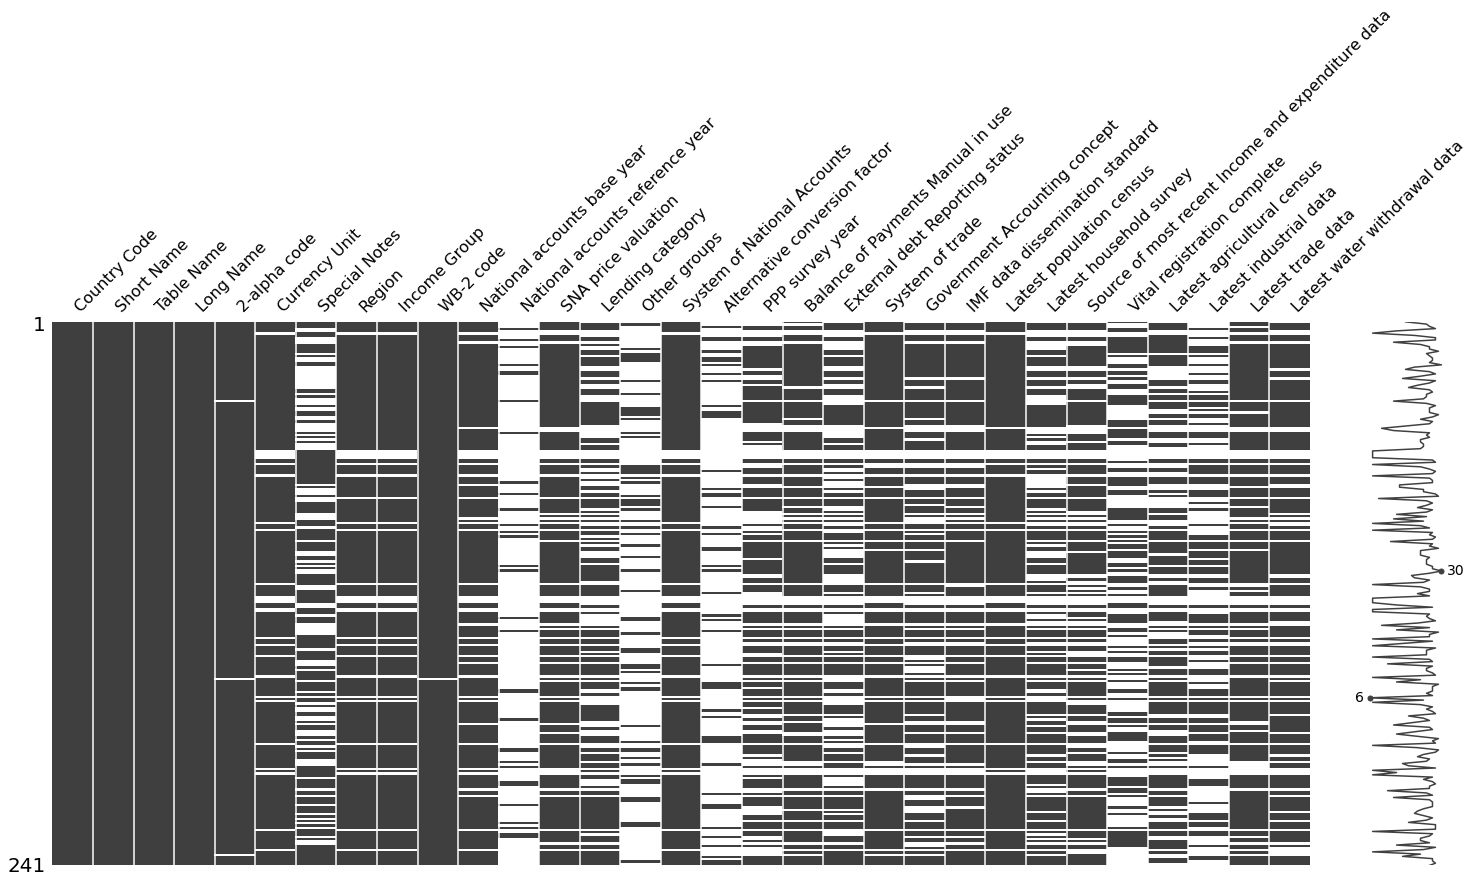

In [210]:
msn.matrix(country)

In [13]:
## % de na par index

In [211]:
country.isnull().sum().sum()

2113

In [212]:
na=2113/(241*32)

In [213]:
print(na)

0.2739885892116183


In [214]:
# y'a t'il des doublons sur Country Code 

In [215]:
doublons = country[country.duplicated(['Country Code'])]
doublons.shape

(0, 31)

In [216]:
# nombre de region

In [217]:
Regions=country['Region'].unique()
Regions.shape

(8,)

In [218]:
print('Régions:',country['Region'].unique())

Régions: ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [219]:
#visualiser regions

In [220]:
# pays par region

In [221]:
df=pays_par_region=country.groupby('Region')[['Short Name']].count()

In [222]:
df.head(7)

,Short Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


<AxesSubplot:ylabel='Region'>

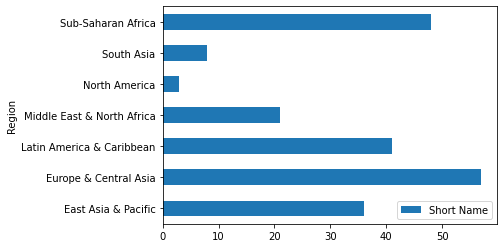

In [223]:
df.plot(kind='barh')

In [224]:
# groupement par revenu

In [225]:
pays_par_revenu=country.groupby('Income Group')[['Short Name']].count()
pays_par_revenu.head()

,Short Name
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


<AxesSubplot:ylabel='Income Group'>

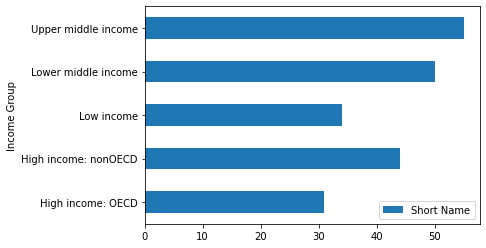

In [226]:
pays_par_revenu.plot(kind='barh')

In [227]:
## détail du nombre de pays par revenu et région

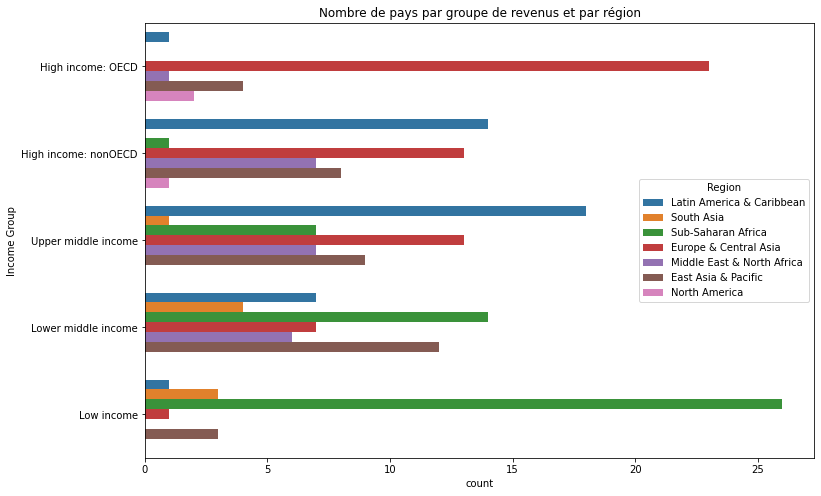

In [228]:
fig=plt.figure(figsize=(12,8))
sns.countplot(y='Income Group', hue='Region', data=country, order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'])
plt.title('Nombre de pays par groupe de revenus et par région')
plt.show()

### Data contient des informations géographiques sur les Régions / Pays/ Revenu
### Data est constituée de 241 x 22 
### A voir si les informations sur les variables Région + Income est à utiliser pour répondre à la problématique?

## DATA EdStatsCountry-Series

In [229]:
country_series = pd.read_csv('EdStatsCountry-Series.csv')
country_series.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [230]:
country_series.shape

(613, 4)

In [231]:
country_series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

<AxesSubplot:>

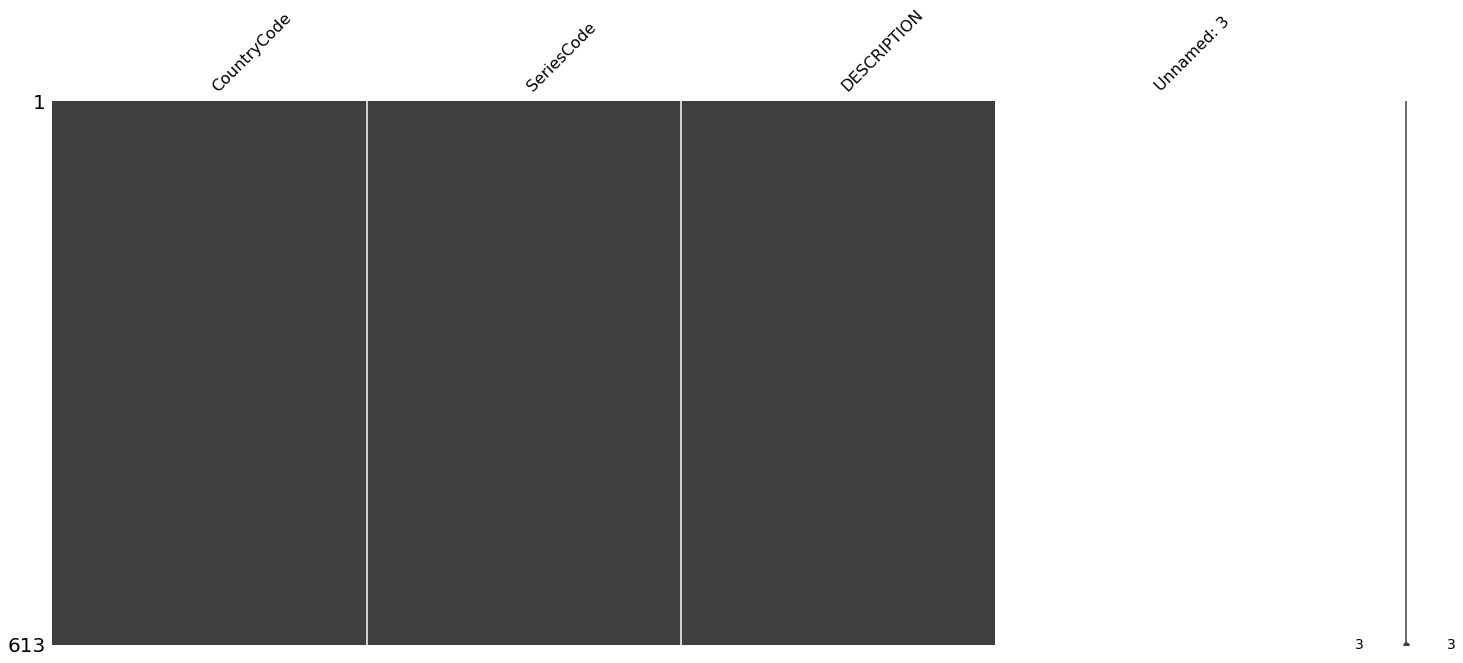

In [232]:
msn.matrix(country_series)

In [36]:
# drop colonne unnamed

In [233]:
country_series.drop(columns=['Unnamed: 3'],inplace=True)

## Data contient des informations sur des sources de certains indicateurs par pays /pays par code
## Data est constituée de 613 x 3 après élimination d'une colonne Unnamed
## valeurs manquantes 0%
## pas utile pour la problématique / informations plus utiles dans le fichier EdStatsCountry

# DATA EdStatsFootnote

In [234]:
foot_note=pd.read_csv('EdStatsFootNote.csv')

In [235]:
foot_note.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [236]:
foot_note.shape

(643638, 5)

<AxesSubplot:>

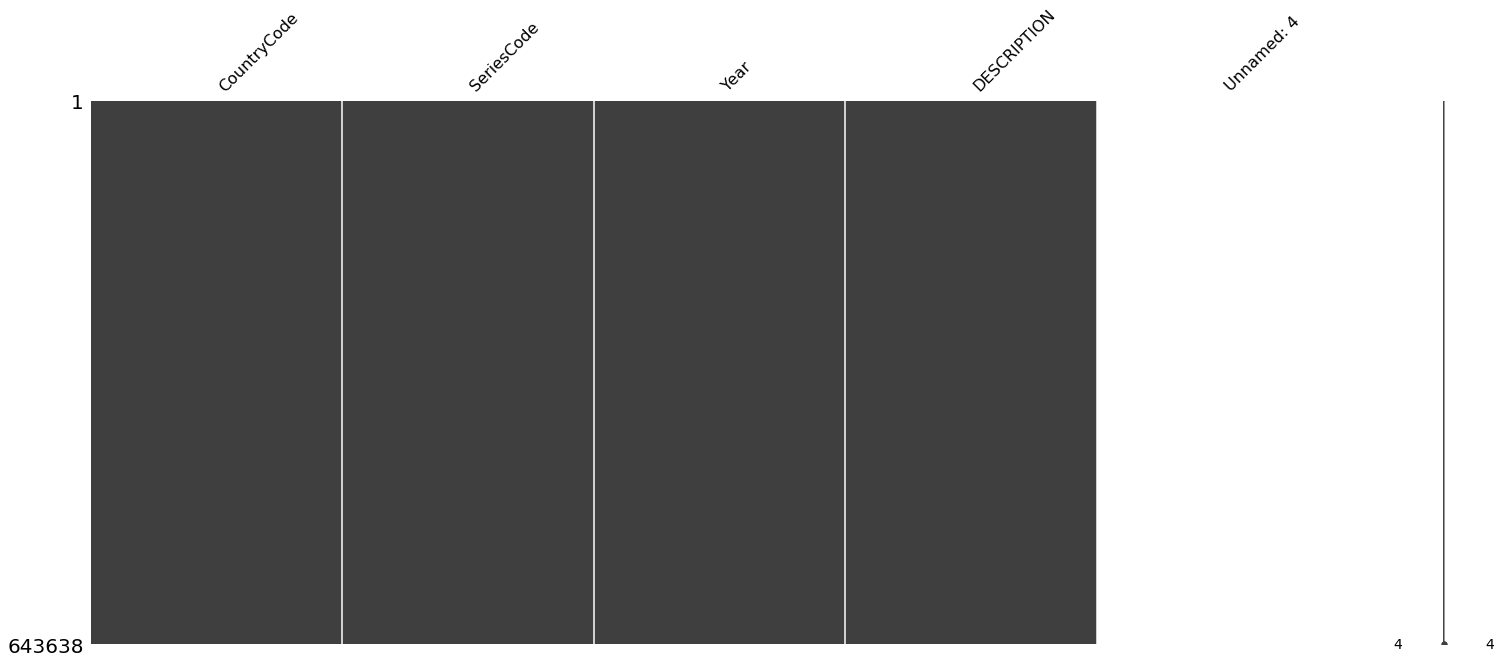

In [237]:
msn.matrix(foot_note)

In [238]:
# drop colonne Unnamed

In [239]:
foot_note.drop(columns=['Unnamed: 4'],inplace=True)

In [240]:
# doublons

In [241]:
foot_note.duplicated().sum()

0

In [242]:
# Groupement des indicateurs par nombre de pays

In [243]:
series_code = foot_note.groupby('SeriesCode')[['CountryCode']].count().sort_values(by='CountryCode')

In [244]:
series_code.head(5)

,CountryCode
SeriesCode,
UIS.XGDP.1.FSGOV,1
SABER.STD.ASS.GOAL4,1
SABER.STD.ASS.GOAL4.LVL1,1
SABER.STD.ASS.GOAL4.LVL2,1
SABER.STD.ASS.GOAL4.LVL3,1


In [245]:
series_code.shape

(1558, 1)

In [246]:
S20=series_code.tail(20)

Text(0.5, 0, 'nombre de pays')

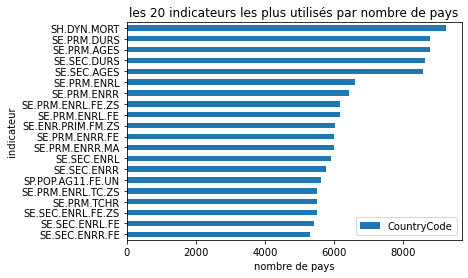

In [247]:
S20.plot(kind='barh')
plt.title("les 20 indicateurs les plus utilisés par nombre de pays")
plt.ylabel("indicateur")
plt.xlabel('nombre de pays')

In [248]:
# groupement des indicateurs par description

In [249]:
par_description = country_series.groupby('DESCRIPTION')[['CountryCode']].count().sort_values(by='CountryCode').tail(20)

Text(0.5, 0, 'nombre de pays')

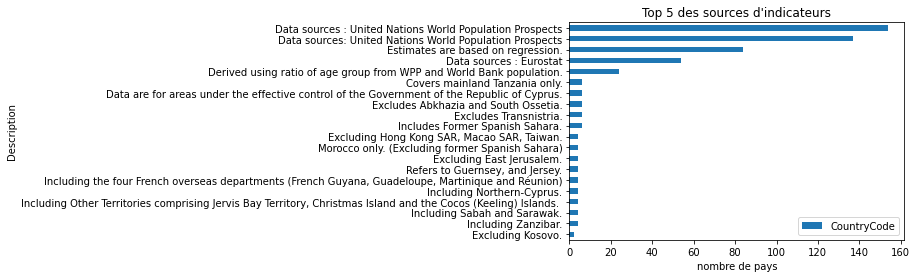

In [250]:
par_description.plot(kind='barh')
plt.title("Top 5 des sources d'indicateurs")
plt.ylabel("Description")
plt.xlabel('nombre de pays')

### Aprés élimination de la dernière colonne nous avons 643638 * 4 les 4 colonnes sont {CountryCode, SeriesCode,Year,DESCRIPTION}
### les données donnent des info sur: les années de références les mises à jour des indicateurs par pays + description des incertitudes
### les sources les plus utilisés: UNWP

# Data EdStatsSeries

In [251]:
Series=pd.read_csv('EdStatsSeries.csv')

In [252]:
Series.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
Series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [254]:
Series.shape

(3665, 21)

<AxesSubplot:>

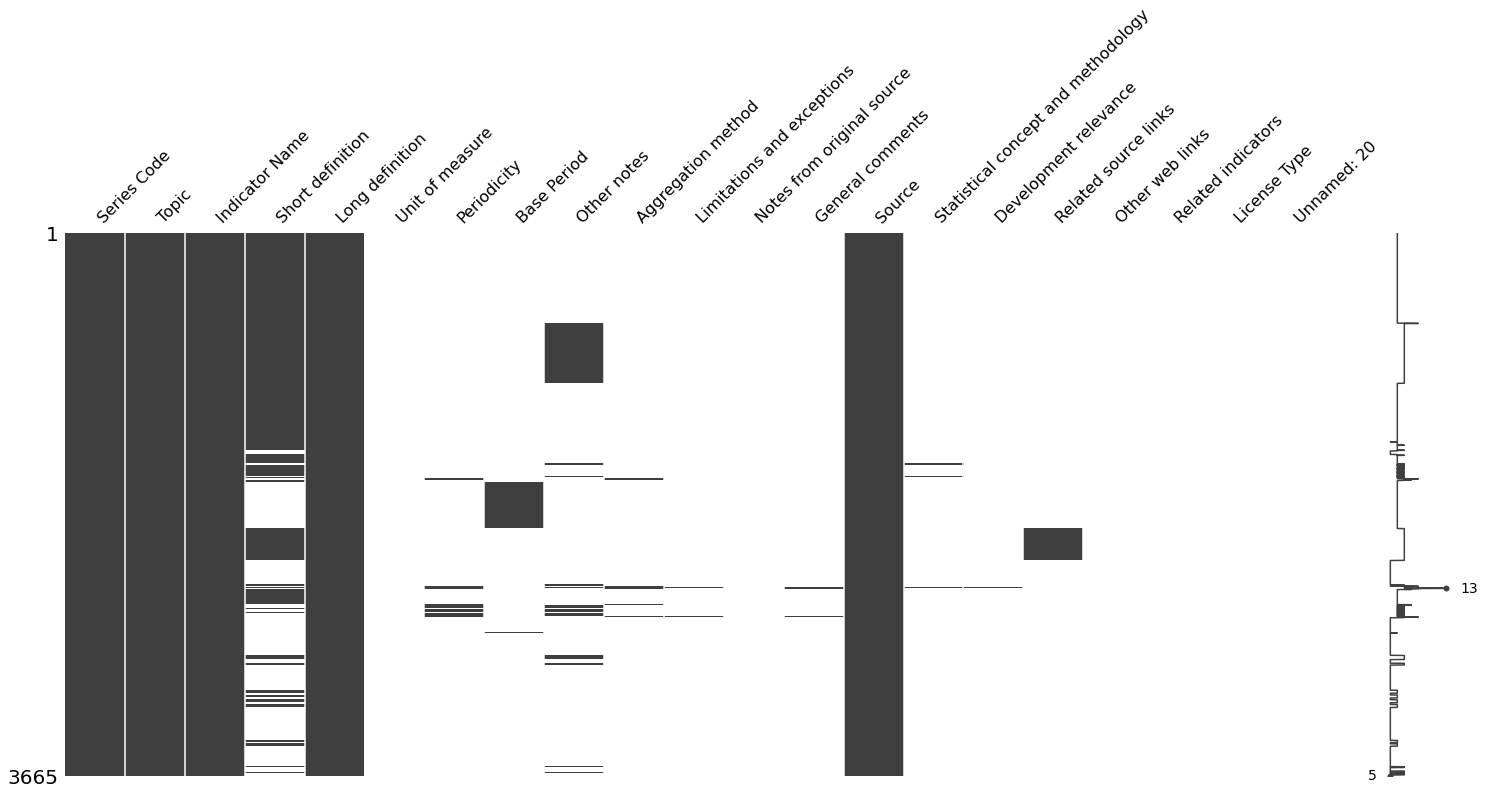

In [255]:
msn.matrix(Series)

In [256]:
Series.isnull().mean()*100

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


In [257]:
Series.isnull().sum().sum()

55203

In [258]:
na=55203/(3665*21)
print(na)

0.7172480997856169


In [259]:
### données manquantes importants --> on crée une liste des variables gardée

In [260]:
Serie_new=Series[['Series Code', 'Topic', 'Indicator Name','Long definition']]

In [261]:
Serie_new.shape

(3665, 4)

<AxesSubplot:>

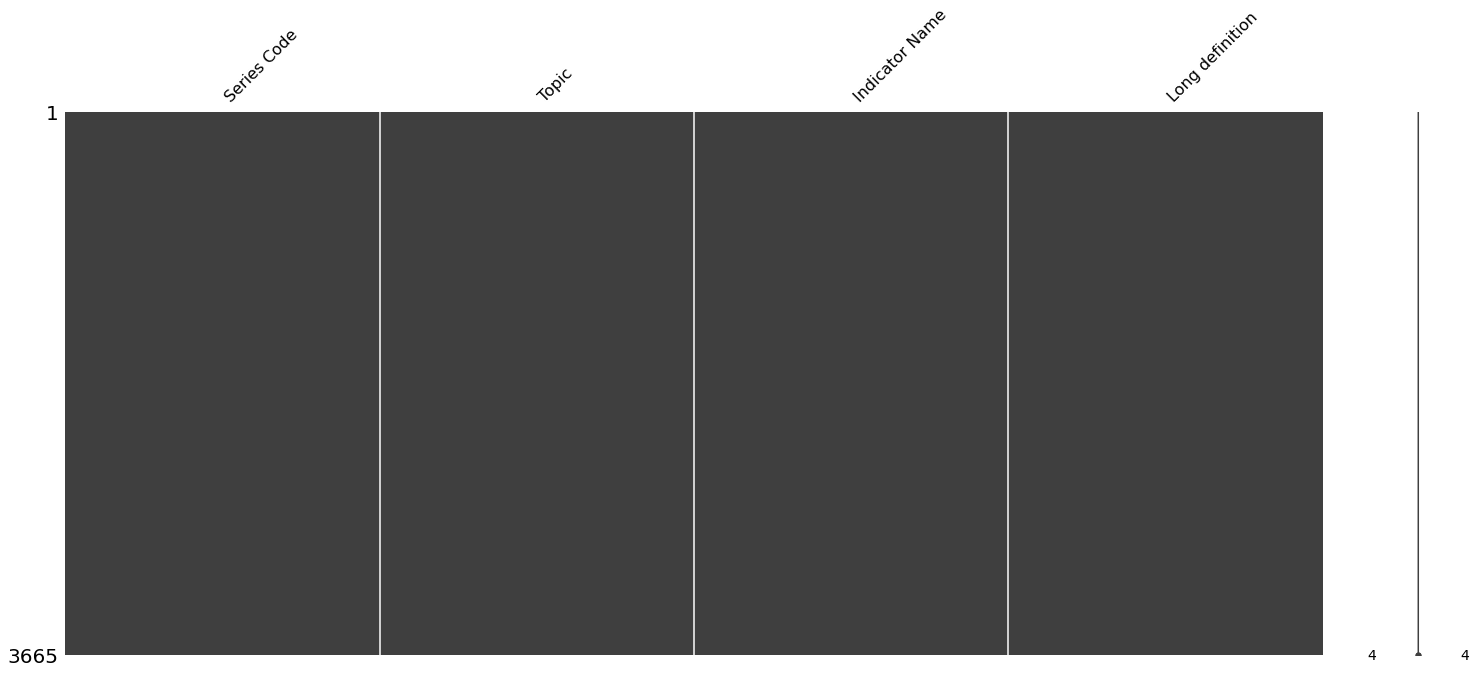

In [262]:
msn.matrix(Serie_new)

In [67]:
##Thèmes traités dans la Serie_new

In [68]:
topic = Serie_new.groupby('Topic')[['Series Code']].count().sort_values(by='Series Code', ascending=False)

In [69]:
topic.head()

,Series Code
Topic,
Learning Outcomes,1046
Attainment,733
Education Equality,426
Secondary,256
Primary,248


Text(0, 0.5, 'thème')

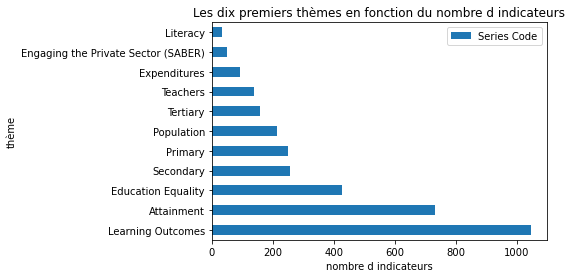

In [70]:
dix_topic=topic.iloc[0:11]
dix_topic.plot(kind='barh')
plt.title('Les dix premiers thèmes en fonction du nombre d indicateurs')
plt.xlabel('nombre d indicateurs')
plt.ylabel('thème')

## données sur les thèmes des indicateurs + les descriptions --> 37 thèmes 
## création d'une serie-new avec 0% données na 

# Data EdStatsData

In [71]:
Data=pd.read_csv('EdStatsData.csv')

In [72]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
Data.shape

(886930, 70)

In [74]:
# visualisation data

<AxesSubplot:>

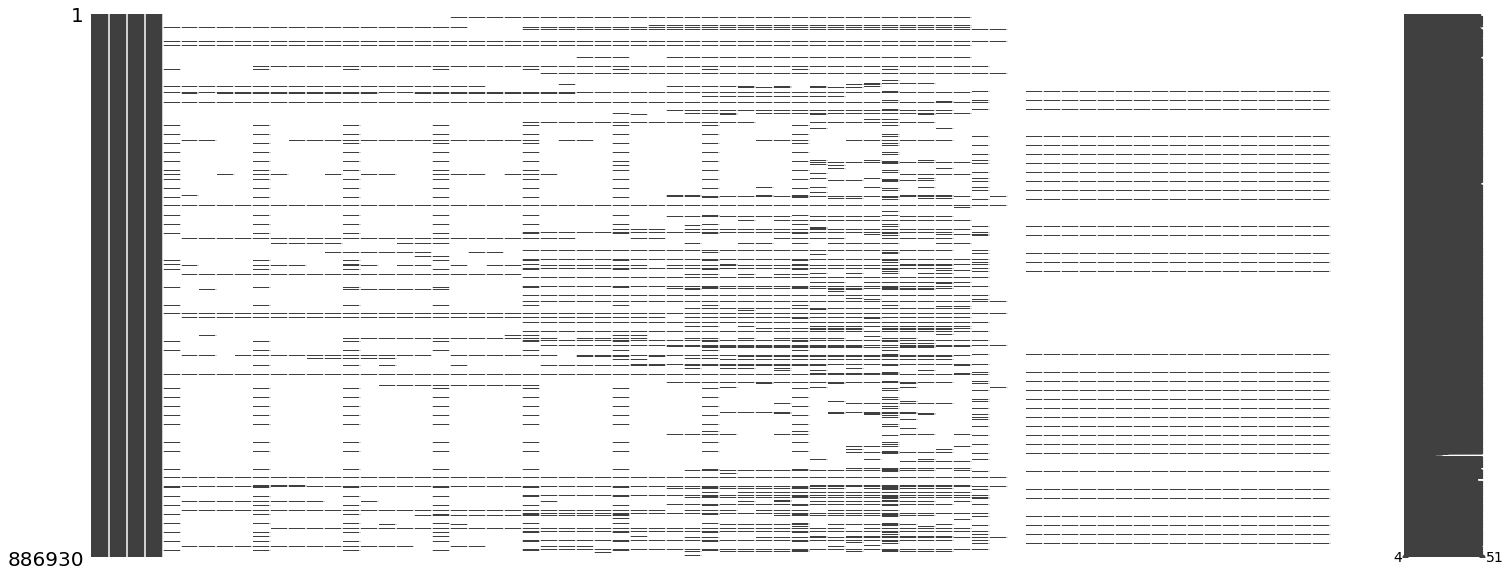

In [75]:
msn.matrix(Data)

In [76]:
pourcentage_na=Data.isnull().mean()*100

In [77]:
pourcentage_na.head

<bound method NDFrame.head of Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64>

In [78]:
Data.isnull().sum().sum()

53455179

In [79]:
na=53455179/(886930*70)
print(na)

0.8609985165522807


(70.0, 100.0)

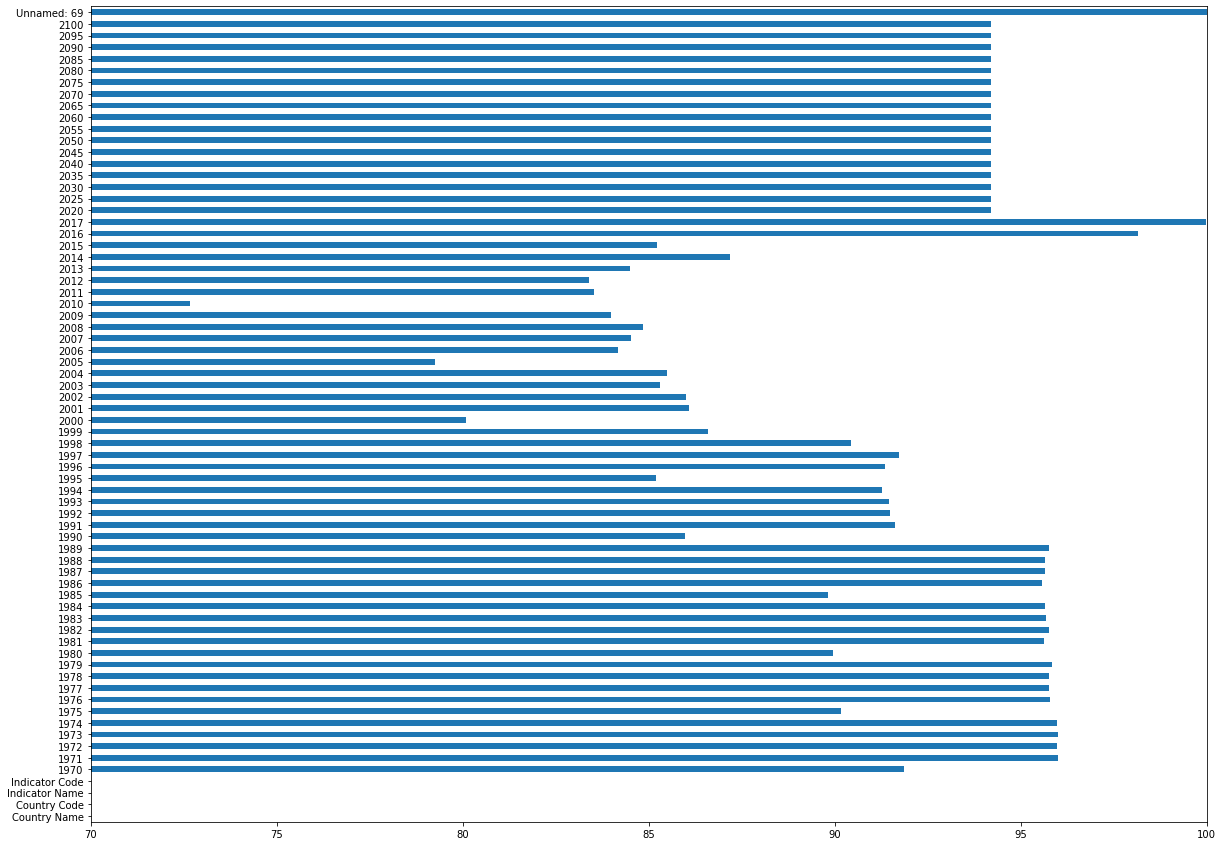

In [80]:
plt.figure(figsize=(20, 15))
pourcentage_na.plot(kind='barh').set_xlim(70,100)

In [81]:
pays=Data.groupby('Country Name')['Country Code'].unique()

In [82]:
pays.shape

(242,)

In [83]:
indic=Data.groupby('Indicator Code')['Country Code'].unique()

In [84]:
indic.shape

(3665,)

# Base d'étude

In [85]:
Base=Data.loc[:,['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']].copy()


In [93]:
Base.shape

(886930, 5)

In [94]:
# Visualiser Base 

<AxesSubplot:>

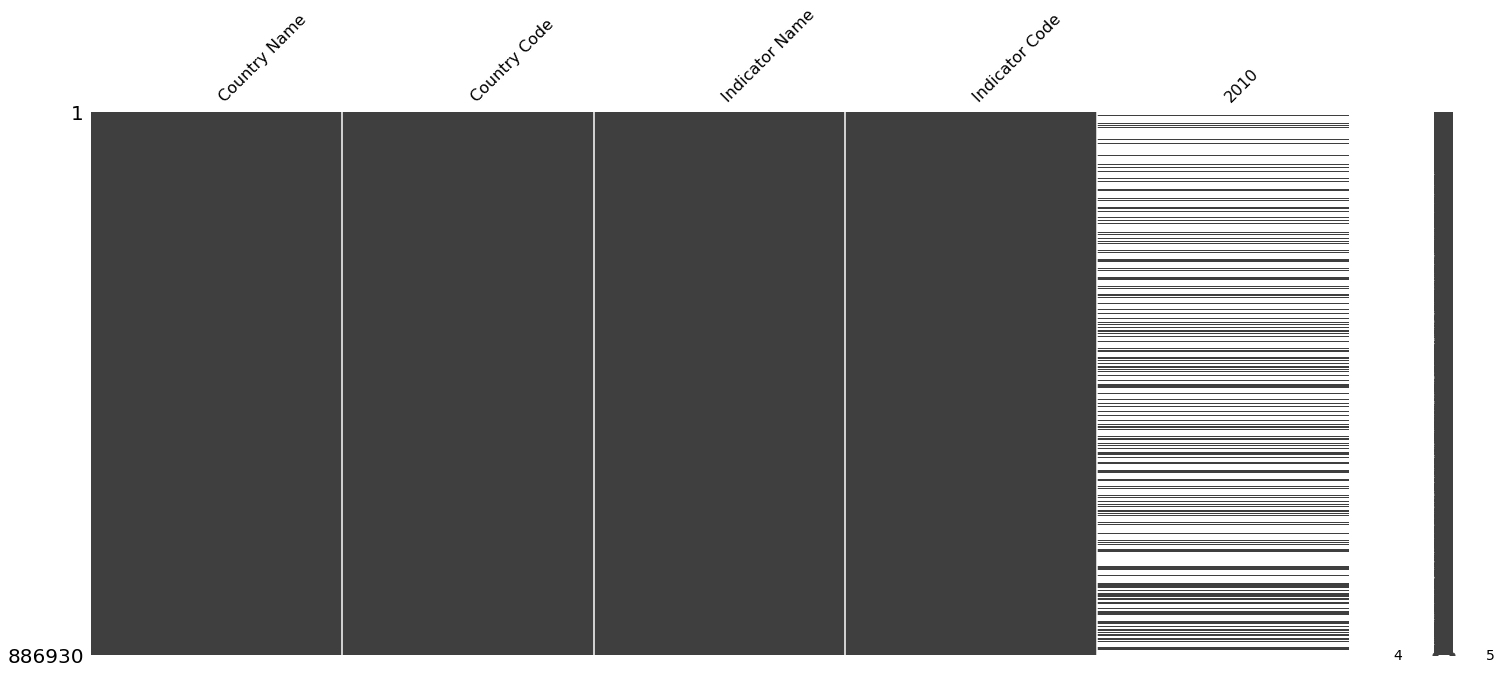

In [95]:
msn.matrix(Base)

In [96]:
Base.isnull().mean()*100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2010              72.665036
dtype: float64

In [97]:
# determiner un taux de remplissage

In [98]:
# grouper par indicateur 

In [99]:
indicator=Base.groupby('Indicator Code')[['Country Name','2010']].count().copy()

In [100]:
indicator.head()

,Country Name,2010
Indicator Code,,
BAR.NOED.1519.FE.ZS,242,144
BAR.NOED.1519.ZS,242,144
BAR.NOED.15UP.FE.ZS,242,144
BAR.NOED.15UP.ZS,242,144
BAR.NOED.2024.FE.ZS,242,144


In [101]:
# taux

In [102]:
taux_rempl_indicator=indicator.assign(taux_remplissage = indicator['2010'] / indicator['Country Name']*100)

In [103]:
taux_rempl_indicator['taux_remplissage'].describe()

count    3665.000000
mean       27.334964
std        30.013774
min         0.000000
25%         0.000000
50%         5.371901
75%        59.504132
max        99.173554
Name: taux_remplissage, dtype: float64

In [104]:
# choix du seuil de remplissage

In [105]:
indicator_retenu=taux_rempl_indicator[taux_rempl_indicator['taux_remplissage']>50]

In [106]:
# liste des indicateurs retenus

In [107]:
liste=indicator_retenu.index

In [108]:



liste

Index(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       'BAR.NOED.15UP.ZS', 'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
       'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS',
       'BAR.NOED.25UP.ZS',
       ...
       'UIS.TE_100000.56', 'UIS.TE_100000.56.F', 'UIS.TE_100000.56.M',
       'UIS.THAGE.0', 'UIS.THAGE.3.A.GPV', 'UIS.THAGE.4.A.GPV', 'UIS.THDUR.0',
       'UIS.THDUR.4.A.GPV', 'UIS.TRANRA.23.GPV.GPI', 'UIS.UAEP.1'],
      dtype='object', name='Indicator Code', length=1183)

In [109]:
# jointure avec la base Series pour intégrer Topic, Long Definition

In [110]:
df=pd.merge(Serie_new, Base)
df.drop(columns=['Series Code'],inplace=True)

In [111]:
df.columns

Index(['Topic', 'Indicator Name', 'Long definition', 'Country Name',
       'Country Code', 'Indicator Code', '2010'],
      dtype='object')

In [112]:
# constituer une base avec les indicateurs retenus dans liste

In [113]:
Base_reduite=df.loc[df['Indicator Code'].isin(liste)]

In [114]:
Base_reduite.shape

(195536, 7)

<AxesSubplot:>

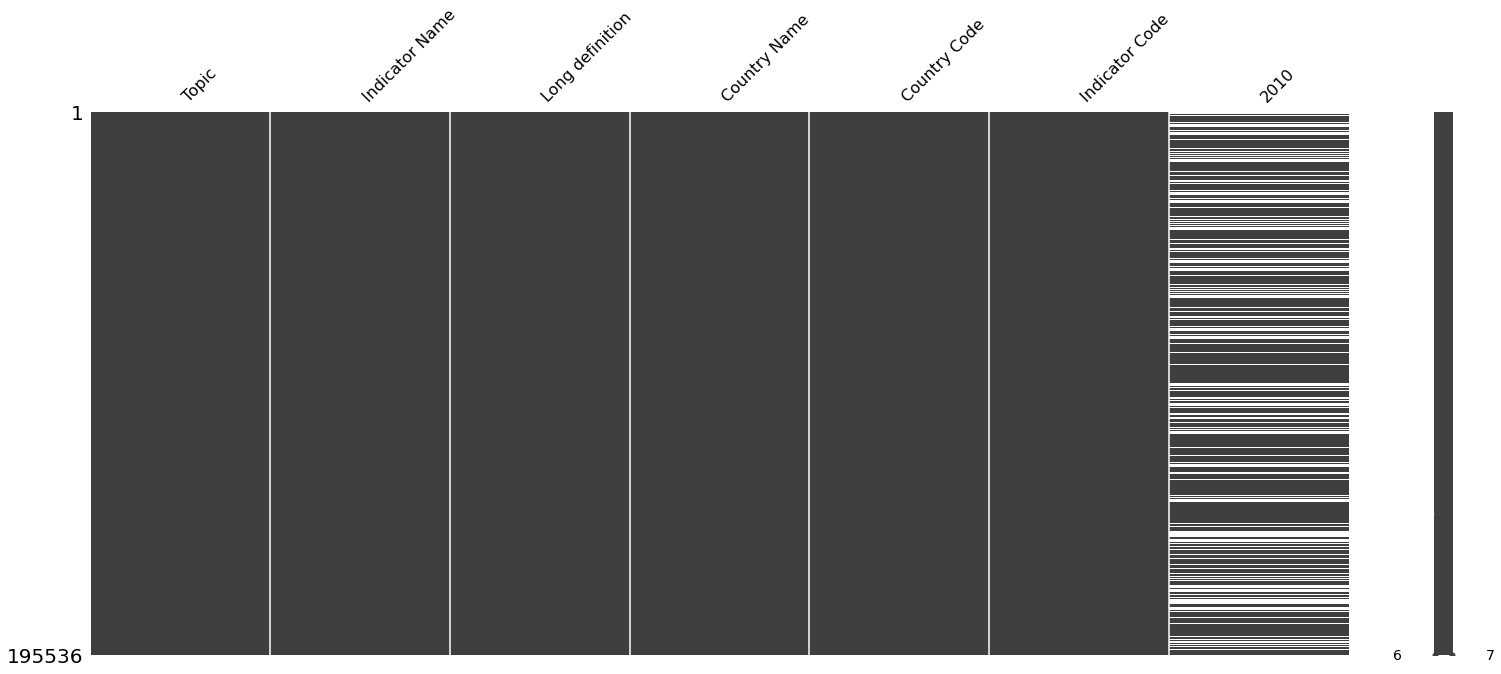

In [115]:
msn.matrix(Base_reduite)

## Problématique
## population scolarisée des lycéens et universitaire ,
## le niveau de vie des habitants
## les moyens de communication (accès au réseau internet, possession d'un ordinateur personnel...)
## mots clefs d'après le site World Education dans les indicateurs
## IT : moyen de communication
## SE : Social Education
## SP : Social Population pour les ages
## NY : National Accounts, produits intérieurs et nationaux
## SEC : pour secondaire, lycée
## TER : pour tertiaire ou enseignement supérieur

In [116]:
# choix des indicateurs se fera par mots clefs

In [117]:
Base_reduite[Base_reduite['Indicator Code'].str.contains('IT.')]

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
147862,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Arab World,ARB,IT.NET.USER.P2,26.747251
147863,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific,EAS,IT.NET.USER.P2,34.230838
147864,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific (excluding high income),EAP,IT.NET.USER.P2,28.957572
147865,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Euro area,EMU,IT.NET.USER.P2,71.036722
147866,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Europe & Central Asia,ECS,IT.NET.USER.P2,56.119117
...,...,...,...,...,...,...,...
148099,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Virgin Islands (U.S.),VIR,IT.NET.USER.P2,31.220000
148100,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,West Bank and Gaza,PSE,IT.NET.USER.P2,37.400000
148101,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,"Yemen, Rep.",YEM,IT.NET.USER.P2,12.350000
148102,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Zambia,ZMB,IT.NET.USER.P2,10.000000


## Nous retenons IT.NET.USER.P2

In [118]:
Base_reduite[Base_reduite['Indicator Code'].str.contains('SE.'+'SEC.'+'ENRR')]

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
464882,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar...",Arab World,ARB,SE.SEC.ENRR,68.050880
464883,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar...",East Asia & Pacific,EAS,SE.SEC.ENRR,81.502632
464884,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar...",East Asia & Pacific (excluding high income),EAP,SE.SEC.ENRR,79.819588
464885,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar...",Euro area,EMU,SE.SEC.ENRR,107.923141
464886,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar...",Europe & Central Asia,ECS,SE.SEC.ENRR,97.858063
...,...,...,...,...,...,...,...
467055,Secondary,"Gross enrolment ratio, upper secondary, male (%)",Total male enrollment in upper secondary educa...,Virgin Islands (U.S.),VIR,SE.SEC.ENRR.UP.MA,NaN
467056,Secondary,"Gross enrolment ratio, upper secondary, male (%)",Total male enrollment in upper secondary educa...,West Bank and Gaza,PSE,SE.SEC.ENRR.UP.MA,70.151642
467057,Secondary,"Gross enrolment ratio, upper secondary, male (%)",Total male enrollment in upper secondary educa...,"Yemen, Rep.",YEM,SE.SEC.ENRR.UP.MA,41.039360
467058,Secondary,"Gross enrolment ratio, upper secondary, male (%)",Total male enrollment in upper secondary educa...,Zambia,ZMB,SE.SEC.ENRR.UP.MA,NaN


## Nous retenons SE.SEC.ENRR

In [119]:
Base_reduite[Base_reduite['Indicator Code'].str.contains('TER.'+'ENRR')]

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
471658,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...,Arab World,ARB,SE.TER.ENRR,24.761801
471659,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...,East Asia & Pacific,EAS,SE.TER.ENRR,27.779831
471660,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...,East Asia & Pacific (excluding high income),EAP,SE.TER.ENRR,24.748091
471661,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...,Euro area,EMU,SE.TER.ENRR,65.686470
471662,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...,Europe & Central Asia,ECS,SE.TER.ENRR,61.452751
...,...,...,...,...,...,...,...
472379,Tertiary,"Gross enrolment ratio, tertiary, male (%)",Total male enrollment in tertiary education (I...,Virgin Islands (U.S.),VIR,SE.TER.ENRR.MA,NaN
472380,Tertiary,"Gross enrolment ratio, tertiary, male (%)",Total male enrollment in tertiary education (I...,West Bank and Gaza,PSE,SE.TER.ENRR.MA,41.092258
472381,Tertiary,"Gross enrolment ratio, tertiary, male (%)",Total male enrollment in tertiary education (I...,"Yemen, Rep.",YEM,SE.TER.ENRR.MA,14.606570
472382,Tertiary,"Gross enrolment ratio, tertiary, male (%)",Total male enrollment in tertiary education (I...,Zambia,ZMB,SE.TER.ENRR.MA,NaN


## nous retenons SE.TER.ENRR

In [120]:
Base_reduite[Base_reduite['Indicator Code'].str.contains('GDP','per Capita')]

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
390588,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,Arab World,ARB,NY.GDP.MKTP.PP.CD,5.022945e+12
390589,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,East Asia & Pacific,EAS,NY.GDP.MKTP.PP.CD,2.586023e+13
390590,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,East Asia & Pacific (excluding high income),EAP,NY.GDP.MKTP.PP.CD,1.718466e+13
390591,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,Euro area,EMU,NY.GDP.MKTP.PP.CD,1.206377e+13
390592,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...,Europe & Central Asia,ECS,NY.GDP.MKTP.PP.CD,2.314772e+13
...,...,...,...,...,...,...,...
391793,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...,Virgin Islands (U.S.),VIR,NY.GDP.PCAP.PP.KD,NaN
391794,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...,West Bank and Gaza,PSE,NY.GDP.PCAP.PP.KD,NaN
391795,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...,"Yemen, Rep.",YEM,NY.GDP.PCAP.PP.KD,4.478744e+03
391796,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...,Zambia,ZMB,NY.GDP.PCAP.PP.KD,3.279277e+03


## nous retenons NY.GDP.PCAP.PP.KD

In [121]:
Base_reduite[Base_reduite['Indicator Name'].str.contains('15-24','total')]

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
507716,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...",Arab World,ARB,SP.POP.1524.FE.UN,NaN
507717,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...",East Asia & Pacific,EAS,SP.POP.1524.FE.UN,NaN
507718,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...",East Asia & Pacific (excluding high income),EAP,SP.POP.1524.FE.UN,NaN
507719,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...",Euro area,EMU,SP.POP.1524.FE.UN,NaN
507720,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...",Europe & Central Asia,ECS,SP.POP.1524.FE.UN,NaN
...,...,...,...,...,...,...,...
508437,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Virgin Islands (U.S.),VIR,SP.POP.1524.TO.UN,NaN
508438,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",West Bank and Gaza,PSE,SP.POP.1524.TO.UN,879328.0
508439,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Yemen, Rep.",YEM,SP.POP.1524.TO.UN,5359034.0
508440,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Zambia,ZMB,SP.POP.1524.TO.UN,2720387.0


## nous retenons SP.POP.1524.TO.UN

In [122]:
# liste des indicateurs retenus pour la problématique

In [123]:
liste=['IT.NET.USER.P2','SE.SEC.ENRR','SE.TER.ENRR','NY.GDP.PCAP.PP.KD','SP.POP.1524.TO.UN']

In [124]:
# Base de donnée pour la problématique

In [125]:
DB=Base_reduite[Base_reduite['Indicator Code'].isin(liste)].copy()

In [126]:
DB.shape

(1210, 7)

In [127]:
DB.head(3)

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
147862,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Arab World,ARB,IT.NET.USER.P2,26.747251
147863,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific,EAS,IT.NET.USER.P2,34.230838
147864,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific (excluding high income),EAP,IT.NET.USER.P2,28.957572


In [128]:
# visualiser DB

<AxesSubplot:>

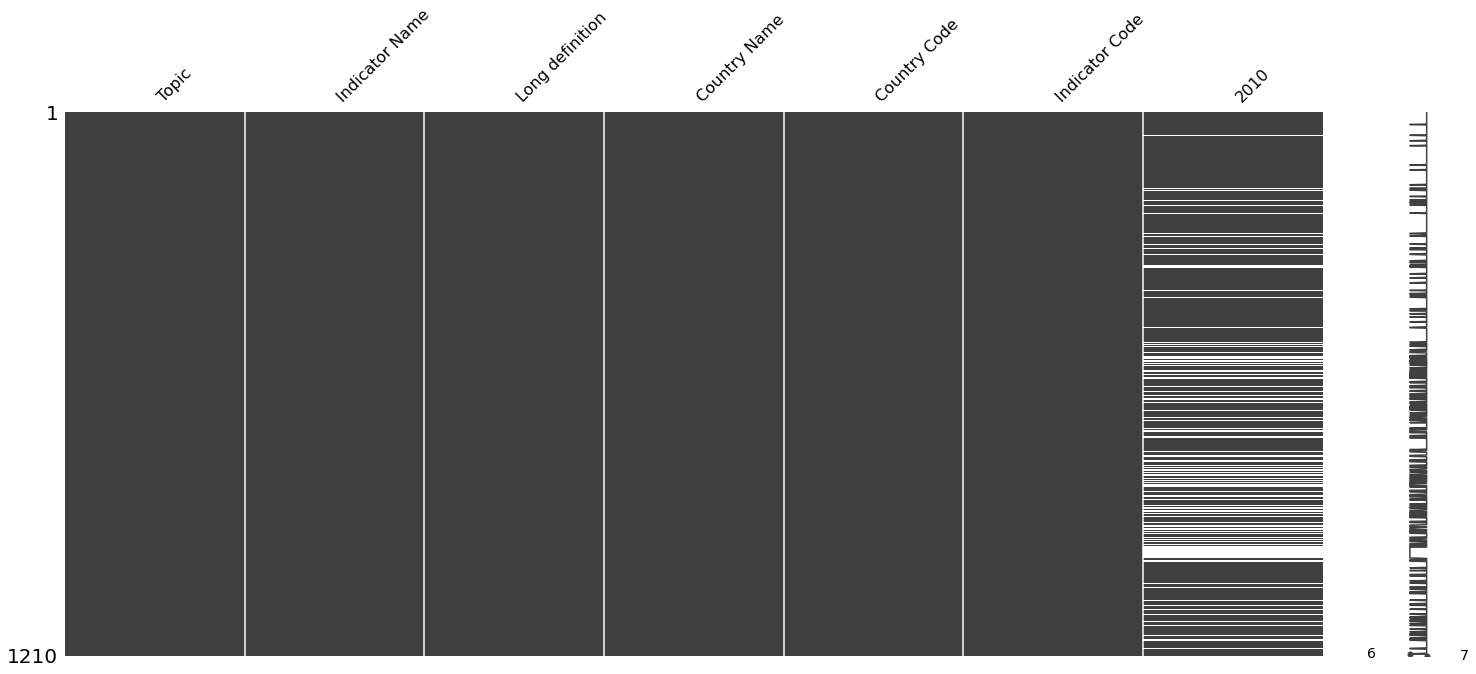

In [129]:
msn.matrix(DB)

In [130]:
DB.isnull().mean()*100

Topic               0.000000
Indicator Name      0.000000
Long definition     0.000000
Country Name        0.000000
Country Code        0.000000
Indicator Code      0.000000
2010               21.322314
dtype: float64

In [131]:
# Nous faisons le choix de prendre uniquement les pays qui remplissent les 5 indicateurs (1 pays= 5 fois renseigné en 2010)

In [132]:
Pays=DB.groupby('Country Name').count()

In [133]:
Pays.head()

,Topic,Indicator Name,Long definition,Country Code,Indicator Code,2010
Country Name,,,,,,
Afghanistan,5,5,5,5,5,4
Albania,5,5,5,5,5,5
Algeria,5,5,5,5,5,5
American Samoa,5,5,5,5,5,0
Andorra,5,5,5,5,5,1


In [134]:
Pays_ret=Pays.loc[Pays['2010']==5]

In [135]:
Pays_ret.shape

(102, 6)

In [136]:
Pays_retenus=Pays_ret.index

In [137]:
DBF=DB.loc[DB['Country Name'].isin(Pays_retenus)]

In [138]:
DBF.head(3)

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010
147888,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Albania,ALB,IT.NET.USER.P2,45.0
147889,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Algeria,DZA,IT.NET.USER.P2,12.5
147894,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Argentina,ARG,IT.NET.USER.P2,45.0


In [139]:
DBF.shape

(510, 7)

# nous retenons 102 pays avec les 5 indicateurs renseignés

<AxesSubplot:>

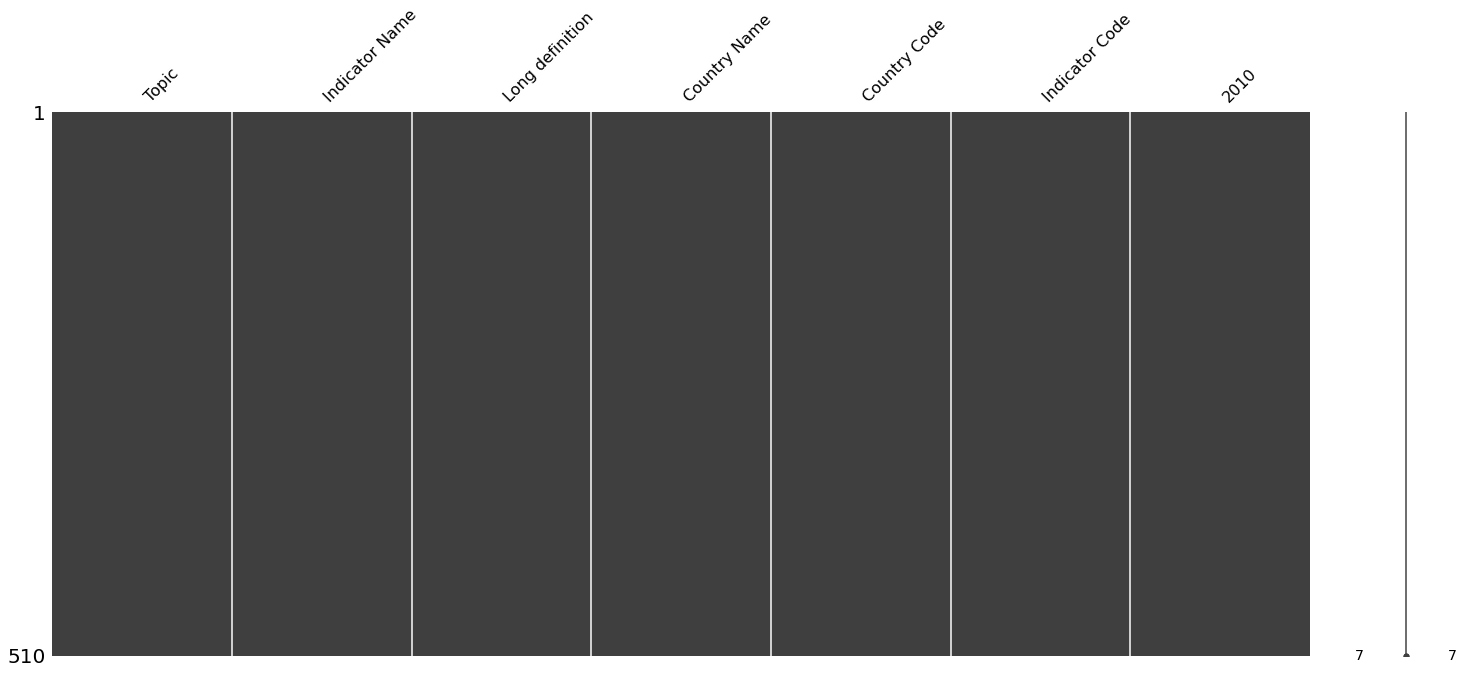

In [140]:
msn.matrix(DBF)

In [141]:
# nous rajoutons les colonnes Region et Income Group au DBF

In [142]:
# creation dataframe

In [143]:
df=pd.DataFrame({'Country_Code' : country['Country Code'],
              'Region' : country['Region'], 'Income Group' : country['Income Group']})

In [144]:
# jointure 

In [145]:
DBf=pd.merge(DBF,df, left_on='Country Code', right_on='Country_Code', how='left')

<AxesSubplot:>

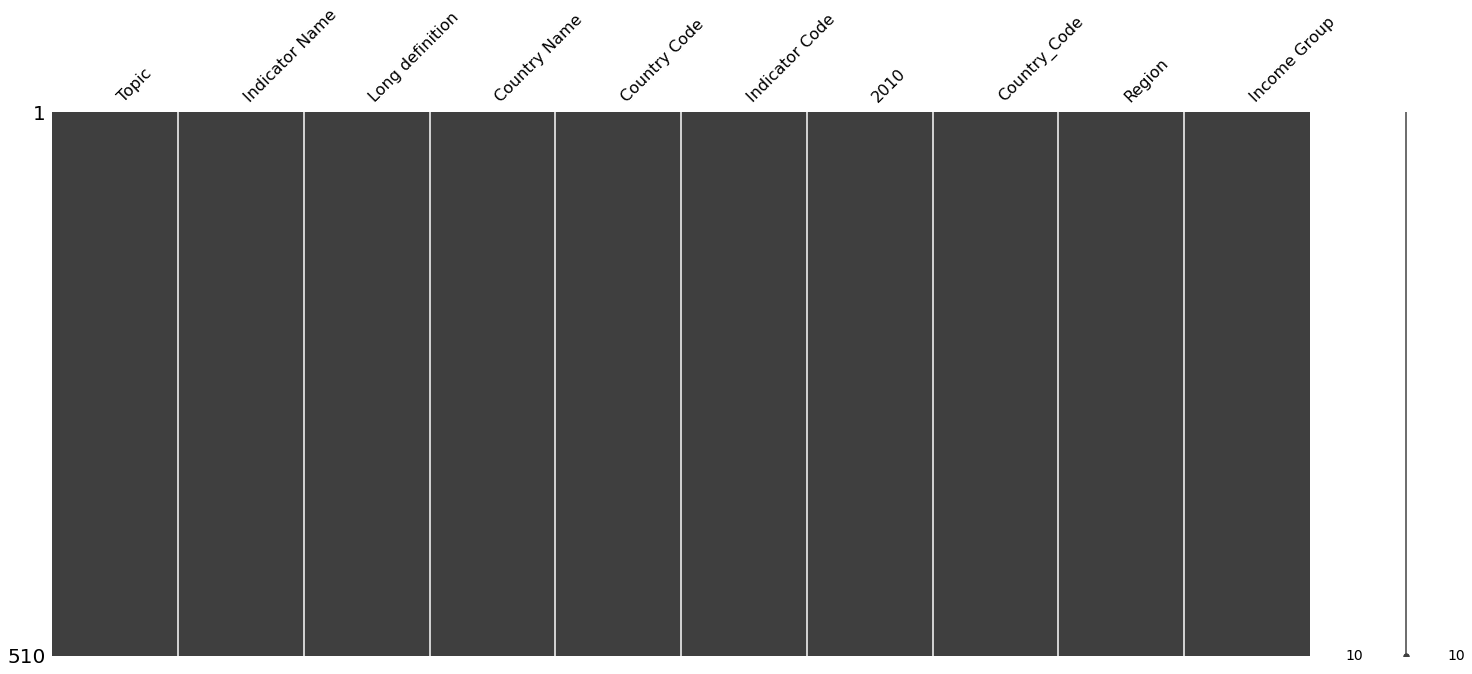

In [146]:
msn.matrix(DBf)

In [147]:
# drop colonne en doube Country_Code

In [148]:
DBf.drop(columns=['Country_Code'],inplace=True)

In [149]:
DBf.shape

(510, 9)

In [150]:
DBf.head(2)

,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2010,Region,Income Group
0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Albania,ALB,IT.NET.USER.P2,45.0,Europe & Central Asia,Upper middle income
1,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Algeria,DZA,IT.NET.USER.P2,12.5,Middle East & North Africa,Upper middle income


# ANALYSE EXPLORATOIRE DE DBf

In [151]:
# analyse indicateur IT.NET.USER.P2

In [152]:
df_it=DBf[DBf['Indicator Code']=='IT.NET.USER.P2']

In [153]:
tab1=df_it.describe().copy()

In [154]:
tab1

,2010
count,102.000000
mean,40.598902
std,28.576803
min,0.610000
25%,12.775000
50%,38.310000
75%,65.625000
max,93.390000


Text(0.5, 1.0, 'Indicateur usage numérique')

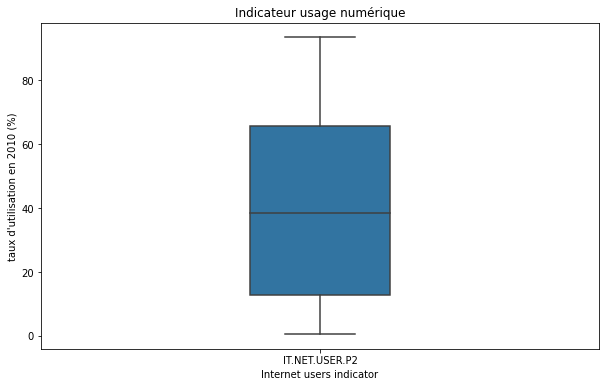

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_it['Indicator Code'], y=df_it['2010'],width=0.25)
plt.xlabel('Internet users indicator')
plt.ylabel('taux d\'utilisation en 2010 (%)')
plt.title('Indicateur usage numérique')

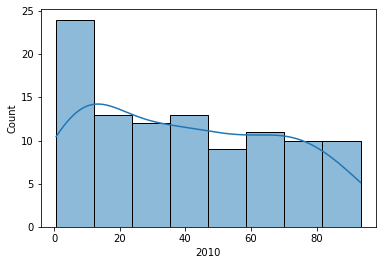

In [156]:
df_it_distrib=sns.histplot(df_it['2010'],kde=True)

In [157]:
# analyse indicateur SE.SEC.ENRR

In [158]:
df_sec=DBf[DBf['Indicator Code']=='SE.SEC.ENRR']

In [159]:
tab2=df_sec.describe().copy()

In [160]:
tab2

,2010
count,102.000000
mean,82.466094
std,27.235686
min,13.518450
25%,69.079590
50%,90.934795
75%,100.595108
max,132.456696


Text(0.5, 1.0, 'Indicateur de scolarisation Lycée')

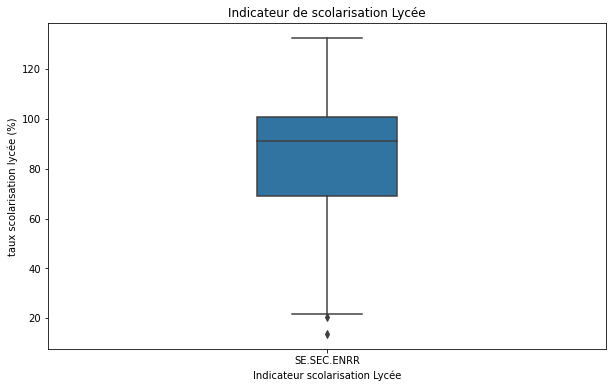

In [161]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_sec['Indicator Code'], y=df_sec['2010'],width=0.25)
plt.xlabel('Indicateur scolarisation Lycée')
plt.ylabel('taux scolarisation lycée (%)')
plt.title('Indicateur de scolarisation Lycée')

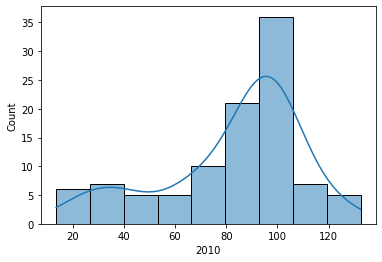

In [162]:
df_sec_distrib=sns.histplot(df_sec['2010'],kde=True)

In [163]:
#analyse indicateur SE.TER.ENRR

In [164]:
df_ter=DBf[DBf['Indicator Code']=='SE.TER.ENRR']

In [165]:
tab3=df_ter.describe().copy()

In [166]:
tab3

,2010
count,102.000000
mean,41.769964
std,28.180143
min,0.692570
25%,15.828093
50%,40.506586
75%,65.534838
max,102.730873


Text(0.5, 1.0, 'Indicateur inscrits ens.sup ')

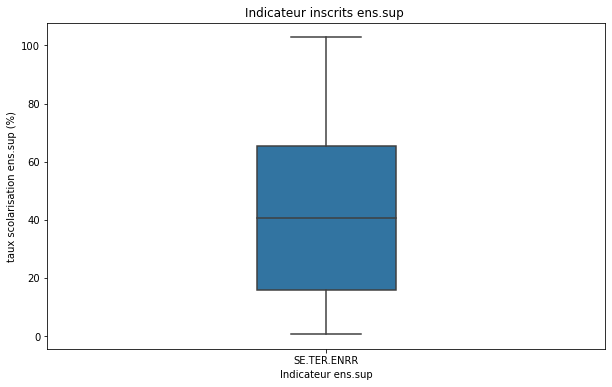

In [167]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_ter['Indicator Code'], y=df_ter['2010'],width=0.25)
plt.xlabel('Indicateur ens.sup')
plt.ylabel('taux scolarisation ens.sup (%)')
plt.title('Indicateur inscrits ens.sup ')

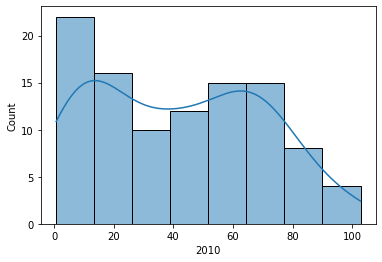

In [168]:
df_ter_distrib=sns.histplot(df_ter['2010'],kde=True)

In [169]:
#analyse indicateur SP.POP.1524.TO.UN

In [170]:
df_sp=DBf[DBf['Indicator Code']=='SP.POP.1524.TO.UN']

In [171]:
tab4=df_sp.describe().copy()

In [172]:
tab4

,2010
count,1.020000e+02
mean,8.639511e+06
std,3.195934e+07
min,3.235800e+04
25%,5.923700e+05
50%,1.316526e+06
75%,5.553751e+06
max,2.350568e+08


Text(0.5, 1.0, 'Indicateur démographique 15-24 ')

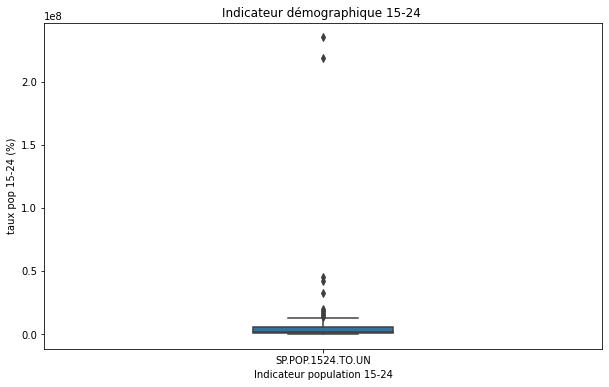

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_sp['Indicator Code'], y=df_sp['2010'],width=0.25)
plt.xlabel('Indicateur population 15-24')
plt.ylabel('taux pop 15-24 (%)')
plt.title('Indicateur démographique 15-24 ')

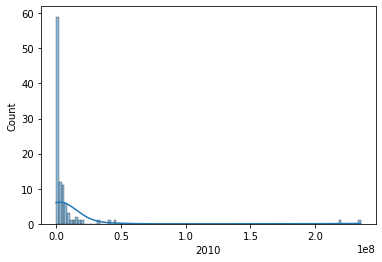

In [174]:
df_sp_distrib=sns.histplot(df_sp['2010'],kde=True)

In [175]:
#analyse indicateur NY.GDP.MKTP.PP.CD

In [176]:
df_ny=DBf[DBf['Indicator Code']=='NY.GDP.PCAP.PP.KD']

In [177]:
tab5=df_ny.describe().copy()

In [178]:
tab5

,2010
count,102.000000
mean,20535.041784
std,21946.495781
min,763.831930
25%,4646.597472
50%,15351.260699
75%,28714.152620
max,125140.838348


Text(0.5, 1.0, 'Indicateur économique')

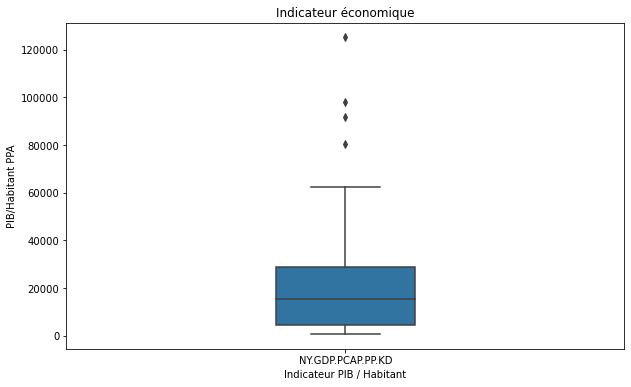

In [179]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_ny['Indicator Code'], y=df_ny['2010'],width=0.25)
plt.xlabel('Indicateur PIB / Habitant')
plt.ylabel('PIB/Habitant PPA')
plt.title('Indicateur économique')

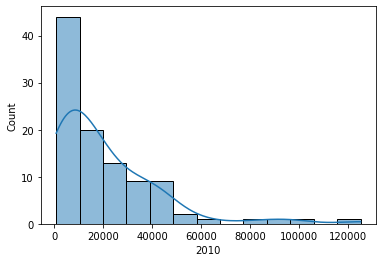

In [180]:
df_ny_distrib=sns.histplot(df_ny['2010'],kde=True)

In [181]:
# Statistiques: mean, mediane, std des données

In [182]:
std_num=df_it['2010'].std()
std_eco=df_ny['2010'].std()
std_lycee=df_sec['2010'].std()
std_univ=df_ter['2010'].std()
std_pop=df_sp['2010'].std()

In [183]:
std=['std',std_num, std_eco,std_lycee, std_univ, std_pop]

In [184]:
median_num=df_it['2010'].median()
median_eco=df_ny['2010'].median()
median_lycee=df_sec['2010'].median()
median_univ=df_ter['2010'].median()
median_pop=df_sp['2010'].median()

In [185]:
mediane=['Median',median_num,median_eco,median_lycee,median_univ,median_pop]

In [186]:
mean_num=df_it['2010'].mean()
mean_eco=df_ny['2010'].mean()
mean_lycee=df_sec['2010'].mean()
mean_univ=df_ter['2010'].mean()
mean_pop=df_sp['2010'].mean()

In [187]:
moyenne=['Mean',mean_num,mean_eco,mean_lycee,mean_univ,mean_pop]

In [188]:
stats=[moyenne,mediane,std]

In [189]:
Tableau_stats = pd.DataFrame(stats,columns=['Stat','Indic_num','Indic_eco','Indic_Lycee','Indic_univ','Indic_pop'])

In [190]:
Tableau_stats.head()

,Stat,Indic_num,Indic_eco,Indic_Lycee,Indic_univ,Indic_pop
0,Mean,40.598902,20535.041784,82.466094,41.769964,8.639511e+06
1,Median,38.310000,15351.260699,90.934795,40.506586,1.316526e+06
2,std,28.576803,21946.495781,27.235686,28.180143,3.195934e+07


In [191]:
# correlation des indicateurs

In [196]:
DBf_pays.corr()

NameError: name 'DBf_pays' is not defined

In [193]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(DBf_pays.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12);

NameError: name 'DBf_pays' is not defined

<Figure size 1152x432 with 0 Axes>

In [579]:
#pairplot

In [598]:
cols=DBf_pays.index

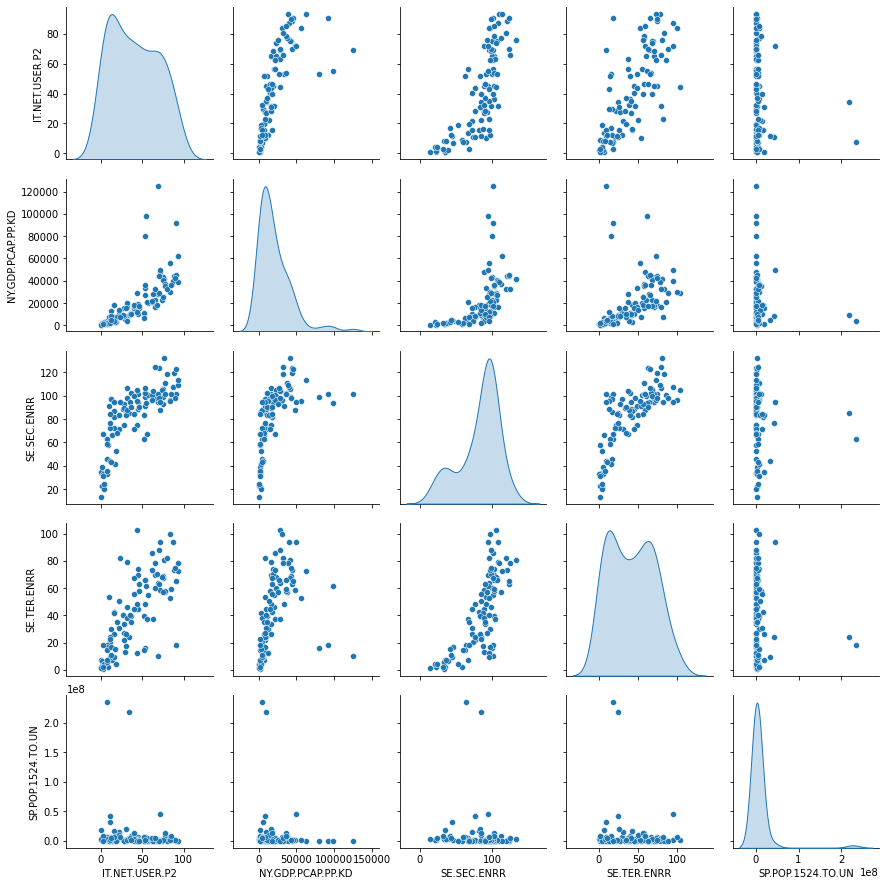

In [605]:
sns.pairplot(DBf_pays,diag_kind="kde")

In [257]:
# creation df pays/Indicateurs

In [258]:
DBf_pays=DBf.pivot_table(index=['Country Name'], columns="Indicator Code")['2010']

In [259]:
DBf_pays.head(3)

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Albania,45.0,9927.119576,88.411636,44.540649,608456.0
Algeria,12.5,12870.602699,97.171921,29.834560,7245764.0
Argentina,45.0,18712.063077,101.801117,73.939201,6828321.0


In [260]:
# classement pays par indicateur

In [261]:
# classement selon indicateur numérique 

In [270]:
num=DBf_pays['IT.NET.USER.P2']

In [276]:
tenbest=num.sort_values().tail(10)

Text(0, 0.5, 'Pays')

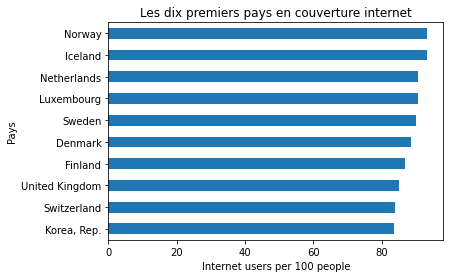

In [281]:
tenbest.plot(kind='barh')
plt.title('Les dix premiers pays en couverture internet')
plt.xlabel('Internet users per 100 people')
plt.ylabel('Pays')

In [282]:
# classement pays selon GDP/Hab

In [283]:
pib=DBf_pays['NY.GDP.PCAP.PP.KD']

In [284]:
tenbest=pib.sort_values().tail(10)

Text(0, 0.5, 'Pays')

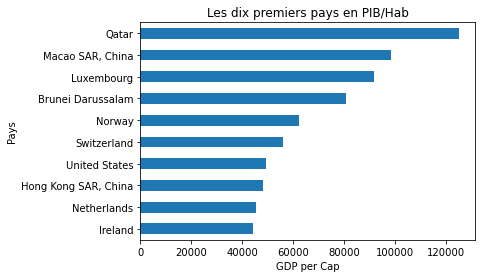

In [285]:
tenbest.plot(kind='barh')
plt.title('Les dix premiers pays en PIB/Hab')
plt.xlabel('GDP per Cap')
plt.ylabel('Pays')

In [286]:
# classement indicateur Lycee

In [287]:
sec=DBf_pays['SE.SEC.ENRR']

In [288]:
tenbest=sec.sort_values().tail(10)

Text(0, 0.5, 'Pays')

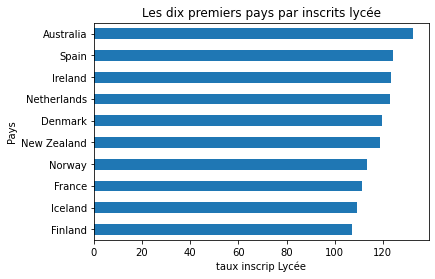

In [289]:
tenbest.plot(kind='barh')
plt.title('Les dix premiers pays par inscrits lycée')
plt.xlabel('taux inscrip Lycée')
plt.ylabel('Pays')

In [290]:
# classement pays par inscription univ

In [291]:
ter=DBf_pays['SE.TER.ENRR']

In [292]:
tenbest=ter.sort_values().tail(10)

Text(0, 0.5, 'Pays')

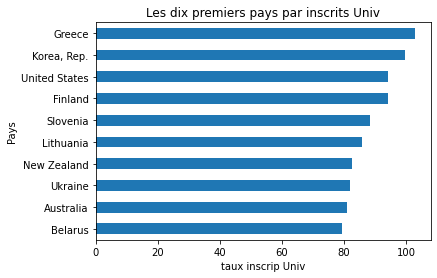

In [293]:
tenbest.plot(kind='barh')
plt.title('Les dix premiers pays par inscrits Univ')
plt.xlabel('taux inscrip Univ')
plt.ylabel('Pays')

In [294]:
#classement pays par pop15-24

In [295]:
pop=DBf_pays['SP.POP.1524.TO.UN']

In [297]:
tenbest=pop.sort_values().tail(10)

Text(0, 0.5, 'Pays')

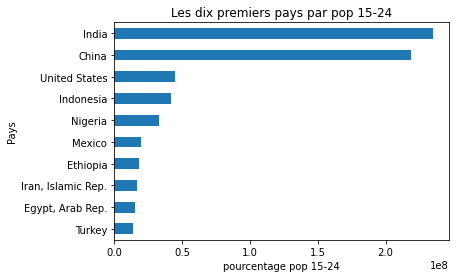

In [299]:
tenbest.plot(kind='barh')
plt.title('Les dix premiers pays par pop 15-24')
plt.xlabel('pourcentage pop 15-24')
plt.ylabel('Pays')

In [300]:
# creation d'un score pour classement des pays

In [341]:
data_set=DBf_pays.copy()

In [342]:
# normaliser les données 

In [404]:
from sklearn.preprocessing import StandardScaler

In [405]:
scaler= StandardScaler()

In [406]:
cols=['IT.NET.USER.P2','NY.GDP.PCAP.PP.KD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [407]:
scaled=scaler.fit_transform(data_set[cols])

In [408]:
df_scaled=pd.DataFrame(scaled,columns=cols)

In [409]:
df_scaled.head()

,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
0,0.154770,-0.485741,0.219378,0.098806,-0.252531
1,-0.988132,-0.350958,0.542613,-0.425631,-0.043825
2,0.154770,-0.083475,0.713421,1.147194,-0.056952
3,1.244923,0.954724,1.844546,1.396034,-0.180025
4,1.215735,1.046289,0.604983,0.961505,-0.239949


<AxesSubplot:ylabel='Count'>

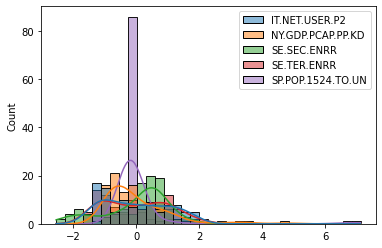

In [602]:
sns.histplot(df_scaled,kde=True)

In [411]:
data_set.loc[:,:] = scaled

In [737]:
data_set

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Albania,0.154770,-0.485741,0.219378,0.098806,-0.252531
Algeria,-0.988132,-0.350958,0.542613,-0.425631,-0.043825
Argentina,0.154770,-0.083475,0.713421,1.147194,-0.056952
Australia,1.244923,0.954724,1.844546,1.396034,-0.180025
Austria,1.215735,1.046289,0.604983,0.961505,-0.239949
...,...,...,...,...,...
United Kingdom,1.561419,0.724951,0.717396,0.616832,-0.018999
United States,1.093357,1.320484,0.437063,1.870718,1.147640
Uruguay,0.204003,-0.158098,0.288901,0.761860,-0.255439


In [413]:
# calcul score

In [1450]:
score=data_set['IT.NET.USER.P2']*5+data_set['NY.GDP.PCAP.PP.KD']*2+data_set['SE.SEC.ENRR']*2
+data_set['SE.TER.ENRR']*3+data_set['SP.POP.1524.TO.UN']*4

Country Name
Albania           -0.713705
Algeria           -1.452195
Argentina          3.213777
Australia          3.468004
Austria            1.924719
                    ...    
United Kingdom     1.774502
United States     10.202713
Uruguay            1.263823
Uzbekistan        -3.760556
Yemen, Rep.       -3.750123
Length: 102, dtype: float64

In [1451]:
Rate=score.to_frame(name='rate')

In [1452]:
Score_sorted=score.sort_values().tail(10)

In [1453]:
Scor=Score_sorted.to_frame(name='Score')

In [1454]:
ss=Scor.tail(10)

In [1455]:
ss.index

Index(['Finland', 'Australia', 'Switzerland', 'Sweden', 'Iceland', 'Denmark',
       'Netherlands', 'Norway', 'Qatar', 'Luxembourg'],
      dtype='object', name='Country Name')

Text(0, 0.5, 'Pays')

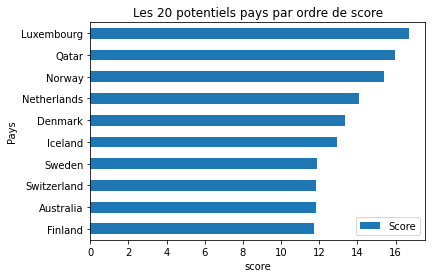

In [1456]:
Scor.plot(kind='barh')
plt.title('Les 20 potentiels pays par ordre de score')
plt.xlabel('score')
plt.ylabel('Pays')

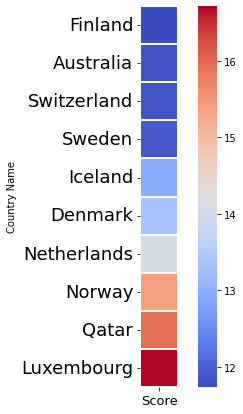

In [1457]:
fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(Scor, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 13)
plt.show()

# données par Region

In [1458]:
df= pd.DataFrame({'Country Name' : DBf['Country Name'], 
                                 'Region' : DBf['Region'], 
                                 'Income Group' : DBf['Income Group']})




In [1459]:
df

,Country Name,Region,Income Group
0,Albania,Europe & Central Asia,Upper middle income
1,Algeria,Middle East & North Africa,Upper middle income
2,Argentina,Latin America & Caribbean,Upper middle income
3,Australia,East Asia & Pacific,High income: OECD
4,Austria,Europe & Central Asia,High income: OECD
...,...,...,...
505,United Kingdom,Europe & Central Asia,High income: OECD
506,United States,North America,High income: OECD
507,Uruguay,Latin America & Caribbean,High income: nonOECD
508,Uzbekistan,Europe & Central Asia,Lower middle income


In [1460]:
Rate

,rate
Country Name,
Albania,0.241124
Algeria,-4.557350
Argentina,2.033742
Australia,11.823155
Austria,9.381219
...,...
United Kingdom,10.691789
United States,8.981876
Uruguay,1.281621


In [1461]:
reg=pd.merge(df,Rate,on='Country Name')

In [1462]:
DBF_region=reg.groupby('Region').mean()

In [1463]:
DBF_region.head()

,rate
Region,
East Asia & Pacific,2.370960
Europe & Central Asia,5.589440
Latin America & Caribbean,-1.520440
Middle East & North Africa,-0.646514
North America,8.981876


In [1464]:
DBf_region=DBF_region.sort_values(by='rate')

Text(0, 0.5, 'Region')

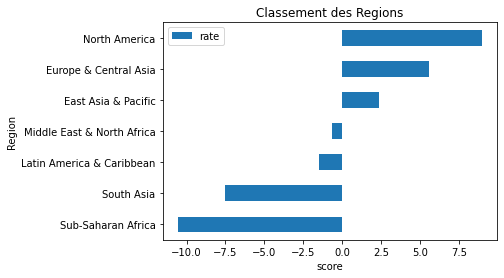

In [1465]:
DBf_region.plot(kind='barh')
plt.title('Classement des Regions')
plt.xlabel('score')
plt.ylabel('Region')

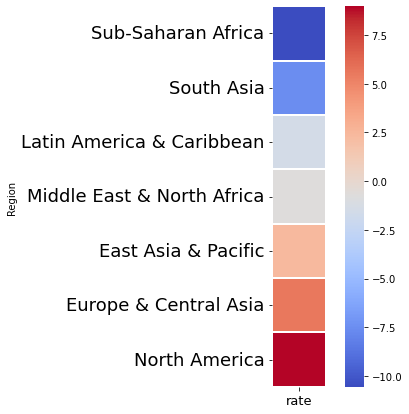

In [1466]:
fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(DBf_region, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 13)
plt.show()

In [1467]:
# classement indicateur par indicateur pour Region

In [1468]:
DBF_reg_ind=pd.merge(reg,DBf_pays,on='Country Name').drop_duplicates()

In [1469]:
DBF_reg_ind.head()

,Country Name,Region,Income Group,rate,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
0,Albania,Europe & Central Asia,Upper middle income,0.241124,45.00,9927.119576,88.411636,44.540649,608456.0
5,Algeria,Middle East & North Africa,Upper middle income,-4.557350,12.50,12870.602699,97.171921,29.834560,7245764.0
10,Argentina,Latin America & Caribbean,Upper middle income,2.033742,45.00,18712.063077,101.801117,73.939201,6828321.0
15,Australia,East Asia & Pacific,High income: OECD,11.823155,76.00,41384.923552,132.456696,80.917084,2914315.0
20,Austria,Europe & Central Asia,High income: OECD,9.381219,75.17,43384.588010,98.862244,68.732178,1008570.0


In [1470]:
DBF_reg_ind.describe()

,rate,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
count,1.020000e+02,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,6.617800e-16,40.598902,20535.041784,82.466094,41.769964,8.639511e+06
std,8.255285e+00,28.576803,21946.495781,27.235686,28.180143,3.195934e+07
min,-1.388672e+01,0.610000,763.831930,13.518450,0.692570,3.235800e+04
25%,-6.569234e+00,12.775000,4646.597472,69.079590,15.828093,5.923700e+05
50%,-4.281698e-01,38.310000,15351.260699,90.934795,40.506586,1.316526e+06
75%,6.936107e+00,65.625000,28714.152620,100.595108,65.534838,5.553751e+06
max,1.670984e+01,93.390000,125140.838348,132.456696,102.730873,2.350568e+08


In [1471]:
# changement intitulé indicateur

In [1472]:
df_reg=DBF_reg_ind.rename(columns={'IT.NET.USER.P2':'num',
                                                'NY.GDP.PCAP.PP.KD':'eco',
                                                'SE.SEC.ENRR':'edu_lycee',
                                                'SE.TER.ENRR':'edu_univ',
                                                 'SP.POP.1524.TO.UN':'pop15-24'})

In [1473]:
df_reg.head()

,Country Name,Region,Income Group,rate,num,eco,edu_lycee,edu_univ,pop15-24
0,Albania,Europe & Central Asia,Upper middle income,0.241124,45.00,9927.119576,88.411636,44.540649,608456.0
5,Algeria,Middle East & North Africa,Upper middle income,-4.557350,12.50,12870.602699,97.171921,29.834560,7245764.0
10,Argentina,Latin America & Caribbean,Upper middle income,2.033742,45.00,18712.063077,101.801117,73.939201,6828321.0
15,Australia,East Asia & Pacific,High income: OECD,11.823155,76.00,41384.923552,132.456696,80.917084,2914315.0
20,Austria,Europe & Central Asia,High income: OECD,9.381219,75.17,43384.588010,98.862244,68.732178,1008570.0


In [1474]:
df_rate_reg=df_reg.groupby('Region').mean()

In [1475]:
df_rate_reg.head()

,rate,num,eco,edu_lycee,edu_univ,pop15-24
Region,,,,,,
East Asia & Pacific,2.370960,45.906286,30895.154463,89.092083,48.636725,2.158049e+07
Europe & Central Asia,5.589440,60.481282,28706.026043,100.694714,61.897686,2.227009e+06
Latin America & Caribbean,-1.520440,34.652000,11705.593988,86.989641,38.914423,3.349282e+06
Middle East & North Africa,-0.646514,35.403000,24142.433814,81.608581,29.930414,5.540066e+06
North America,8.981876,71.690000,49372.619204,94.311310,94.228012,4.513709e+07


In [1476]:
df1=df_rate_reg.sort_values(by='rate',ascending=False)

In [1477]:
df1.head()

,rate,num,eco,edu_lycee,edu_univ,pop15-24
Region,,,,,,
North America,8.981876,71.690000,49372.619204,94.311310,94.228012,4.513709e+07
Europe & Central Asia,5.589440,60.481282,28706.026043,100.694714,61.897686,2.227009e+06
East Asia & Pacific,2.370960,45.906286,30895.154463,89.092083,48.636725,2.158049e+07
Middle East & North Africa,-0.646514,35.403000,24142.433814,81.608581,29.930414,5.540066e+06
Latin America & Caribbean,-1.520440,34.652000,11705.593988,86.989641,38.914423,3.349282e+06


In [1478]:
# classement region par indic num

In [1479]:
bestnum=df1['num'].sort_values()

Text(0, 0.5, 'Region')

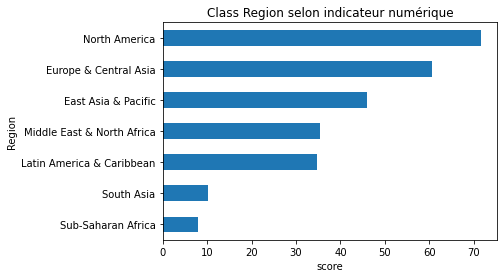

In [1480]:
bestnum.plot(kind='barh')
plt.title('Class Region selon indicateur numérique')
plt.xlabel('score')
plt.ylabel('Region')

In [1481]:
# classement Region par indicateur eco

In [1482]:
besteco=df1['eco'].sort_values()

Text(0, 0.5, 'Region')

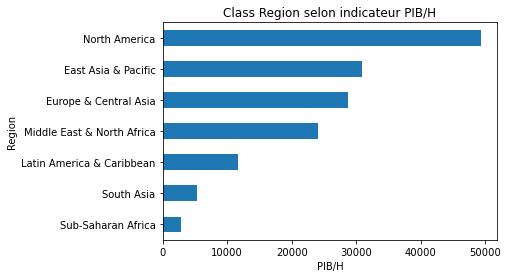

In [1483]:
besteco.plot(kind='barh')
plt.title('Class Region selon indicateur PIB/H')
plt.xlabel('PIB/H')
plt.ylabel('Region')

In [1484]:
#Classement Region par indicateur edu_lycee

In [1485]:
bestlyc=df1['edu_lycee'].sort_values()

Text(0, 0.5, 'Region')

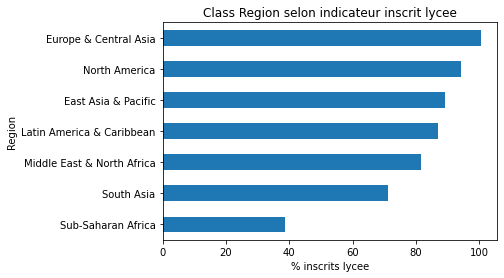

In [1486]:
bestlyc.plot(kind='barh')
plt.title('Class Region selon indicateur inscrit lycee')
plt.xlabel('% inscrits lycee')
plt.ylabel('Region')

In [1487]:
# classement region selon indicateur edu_univ

In [1488]:
bestuniv=df1['edu_univ'].sort_values()

Text(0, 0.5, 'Region')

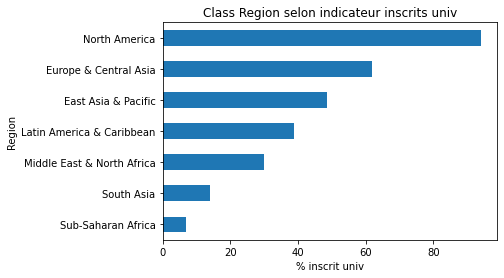

In [1489]:
bestuniv.plot(kind='barh')
plt.title('Class Region selon indicateur inscrits univ')
plt.xlabel('% inscrit univ')
plt.ylabel('Region')

In [1490]:
#classement region selon indicateur popo15-24

In [1491]:
bestpop=df1['pop15-24'].sort_values()

Text(0, 0.5, 'Region')

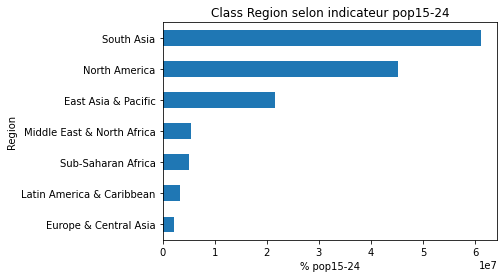

In [1492]:
bestpop.plot(kind='barh')
plt.title('Class Region selon indicateur pop15-24')
plt.xlabel('% pop15-24')
plt.ylabel('Region')

# Prediction

In [1493]:
# data avec les données de projection 2020-2100

In [1494]:
# data frame 2020-2100

In [1495]:
df_score_pred=Data.copy()
df_score_pred=df_score_pred[['Country Name', 'Country Code',
                             'Indicator Name', 'Indicator Code',
                             '2020','2025','2030','2035','2040',
                            '2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100']]

In [746]:
# Données de prédictions existent pour nos pays Top10 pour les années 2020-2100?

In [747]:
liste=(['Finland','Australia','Switzerland','Sweden','Iceland','Denmark','Netherlands','Norway','Qatar','Luxembourg'])

In [761]:
mask_top10=df_score_pred['Country Name'].isin(liste)

In [762]:
# avec les indicateurs retenus?

In [767]:
cols = ['IT.NET.USER.P2','NY.GDP.PCAP.PP.KD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [768]:
mask_indic=df_score_pred['Indicator Code'].isin(cols)

In [769]:
# Data avec les données de prédictions

In [770]:
df_score_pred=df_score_pred[mask_indic][mask_top10]

C:\Users\mehan\AppData\Local\Temp/ipykernel_83076/4199251602.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_score_pred=df_score_pred[mask_indic][mask_top10]


In [814]:
df_score_pred.isnull().sum().sum()

147

## aucune données pour nos pays dans le top 10 sur les années de prédictions 2020-2100

In [1290]:
# regarder l'évolution des indicateurs pays retenus de 2000 à 2020

In [1345]:
df_categ=Data.copy()
df_categ=df_categ[['Country Name', 'Country Code',
                             'Indicator Name', 'Indicator Code']]

In [1346]:
df_numeric=Data[['2000','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [1347]:
data_evol=pd.concat([df_categ, df_numeric], axis=1)

In [1348]:
data_evol.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998


In [1349]:
cols = ['IT.NET.USER.P2','NY.GDP.PCAP.PP.KD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [1350]:
df_indic=data_evol.loc[data_evol['Indicator Code'].isin(cols)]

In [1351]:
dd=df_indic.groupby('Country Name')

In [1352]:
dd.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
1246,Arab World,ARB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11450.860790,11421.495588,11595.944138,12407.231984,12856.601884,13434.034047,13860.417822,14377.830112,14354.814029,14759.050926
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,59.745178,62.234928,64.037773,65.853859,65.931007,65.847931,64.698158,65.342293,66.828903,68.050880
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,18.160900,19.569469,19.558990,20.699190,21.731480,22.191481,22.736540,23.437870,24.098801,24.761801
4911,East Asia & Pacific,EAS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,7187.214052,7705.487745,8076.903971,8534.373303,9028.944551,9619.045952,10361.862887,10821.752755,11135.911756,11968.457127
5000,East Asia & Pacific,EAS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,62.967289,63.144909,64.611069,66.109978,67.223969,69.157028,72.904808,75.508614,78.641663,81.502632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880935,Zambia,ZMB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880939,Zambia,ZMB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884511,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2583.491001,2334.448829,1917.251754,1785.608972,1662.485692,1582.409124,1501.078391,1215.020421,1336.212650,1474.877137
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,42.562271,41.252468,37.618759,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1353]:
pays=ss.index

In [1354]:
df1=df_indic.loc[df_indic['Country Name'].isin(pays)]

In [1355]:
df1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129521,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,35281.395362,36400.727438,37057.491414,38148.919186,38854.837201,39426.020402,40649.664217,41316.600054,41207.128995,41384.923552
129610,Australia,AUS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,162.610046,154.311722,156.194351,149.942062,148.366104,127.389618,126.366379,128.034058,130.318542,132.456696


In [1356]:
# Evolution numérique

In [1357]:
num=df1[df1['Indicator Code']=='IT.NET.USER.P2']

In [1358]:
num.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,46.756116,NaN,NaN,NaN,63.00,66.00,69.45,71.67,74.25,76.00
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,39.172431,64.25,76.26,80.93,82.74,86.65,85.03,85.02,86.84,88.72
334890,Finland,FIN,Internet users (per 100 people),IT.NET.USER.P2,37.248462,62.43,69.22,72.39,74.48,79.66,80.78,83.67,82.49,86.89
411855,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,44.470534,79.12,83.14,83.88,87.00,89.51,90.60,91.00,93.00,93.39
514475,Luxembourg,LUX,Internet users (per 100 people),IT.NET.USER.P2,22.887328,39.84,54.55,65.88,70.00,72.51,78.92,82.23,87.31,90.62


In [1321]:
df_cat=num.copy()
df_cat=num[['Country Code']]

In [1324]:
df_nume=num[['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [1325]:
dfnum=pd.concat([df_cat,df_nume],axis=1)

In [1326]:
dfnum.head(10)

,Country Code,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
129650,AUS,52.689266,NaN,NaN,NaN,63.000000,66.000000,69.45,71.67,74.25,76.00,79.487698,79.000000,83.453497,84.000000,84.560519,88.238658,NaN
287245,DNK,42.957525,64.250000,76.260000,80.930000,82.740000,86.650000,85.03,85.02,86.84,88.72,89.810013,92.260012,94.629700,95.990000,96.330500,96.967785,NaN
334890,FIN,43.105363,62.430000,69.220000,72.390000,74.480000,79.660000,80.78,83.67,82.49,86.89,88.709995,89.879998,91.514400,86.530393,86.422133,87.703650,NaN
411855,ISL,49.392995,79.120000,83.140000,83.880000,87.000000,89.510000,90.60,91.00,93.00,93.39,94.819687,96.209800,96.546800,98.160000,98.200000,98.240016,NaN
514475,LUX,36.163423,39.840000,54.550000,65.880000,70.000000,72.510000,78.92,82.23,87.31,90.62,90.029859,91.949924,93.776500,94.670000,97.334100,97.493930,NaN
602435,NLD,49.373062,61.290000,64.350000,68.520000,81.000000,83.700000,85.82,87.42,89.63,90.72,91.419996,92.859992,93.956400,91.666666,91.724138,90.410959,NaN
628090,NOR,64.000000,72.840000,78.130000,77.690000,81.990000,82.550000,86.93,90.57,92.08,93.39,93.489983,94.649978,95.053400,96.300000,96.810300,97.298204,NaN
672070,QAT,6.170269,10.226129,19.242336,20.701648,24.733494,28.974113,37.00,44.30,53.10,69.00,69.000000,69.300000,85.300000,91.490000,92.884826,94.291118,NaN
778355,SWE,51.765665,70.570000,79.130000,83.890000,84.830000,87.760000,82.01,90.00,91.00,90.00,92.769986,93.179988,94.783600,92.520000,90.610200,91.506828,NaN
782020,CHE,55.100000,61.400000,65.100000,67.800000,70.100000,75.700000,77.20,79.20,81.30,83.90,85.193028,85.200000,86.340000,87.400000,87.479056,89.405568,NaN


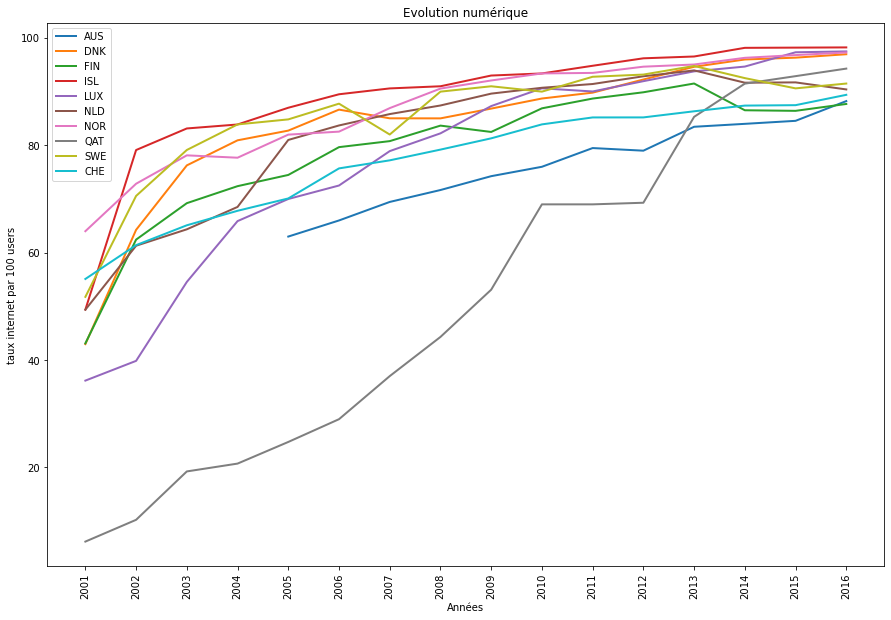

In [1327]:
plt.figure(figsize=(15, 10))
x = dfnum.columns[1:]
for index in range(10):
    y = dfnum.iloc[index][1:]
    plt.plot(x, y, label = dfnum.iloc[index][0],linewidth = 2)
    plt.title('Evolution numérique')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('taux internet par 100 users')
    plt.legend(prop = {'size': 10})

In [1224]:
# Evolution economique

In [1370]:
gdp=df1[df1['Indicator Code']=='NY.GDP.PCAP.PP.KD']

In [1371]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129521,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,35281.395362,36400.727438,37057.491414,38148.919186,38854.837201,39426.020402,40649.664217,41316.600054,41207.128995,41384.923552
287116,Denmark,DNK,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,42337.714369,42595.587222,42645.583125,43670.445300,44567.931309,46159.913739,46373.516663,45865.795958,43382.625459,43998.436672
334761,Finland,FIN,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,34887.178799,36218.240157,36852.443924,38188.251092,39115.764793,40546.080726,42467.260996,42574.641137,38867.799446,39848.134498
411726,Iceland,ISL,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,34097.296172,34735.494663,35337.528614,37865.887013,39770.039093,40789.964315,43489.495168,43336.840119,40190.175412,38815.275650
514346,Luxembourg,LUX,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,81689.816401,85032.711880,85374.339832,87209.819398,88610.289869,91724.182485,97864.195101,94900.346724,89098.734244,91743.293891


In [1372]:
df1_cat=gdp[['Country Code']]

In [1373]:
df_pop=gdp[['2000','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [1374]:
dfgdp=pd.concat([df1_cat,df_pop],axis=1)

In [1375]:
dfgdp.head(10)

,Country Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129521,AUS,35281.395362,36400.727438,37057.491414,38148.919186,38854.837201,39426.020402,40649.664217,41316.600054,41207.128995,41384.923552
287116,DNK,42337.714369,42595.587222,42645.583125,43670.445300,44567.931309,46159.913739,46373.516663,45865.795958,43382.625459,43998.436672
334761,FIN,34887.178799,36218.240157,36852.443924,38188.251092,39115.764793,40546.080726,42467.260996,42574.641137,38867.799446,39848.134498
411726,ISL,34097.296172,34735.494663,35337.528614,37865.887013,39770.039093,40789.964315,43489.495168,43336.840119,40190.175412,38815.275650
514346,LUX,81689.816401,85032.711880,85374.339832,87209.819398,88610.289869,91724.182485,97864.195101,94900.346724,89098.734244,91743.293891
602306,NLD,41721.694046,42062.047271,41982.921429,42686.886832,43507.300430,44965.884997,46527.618386,47134.302992,45125.805919,45524.662143
627961,NOR,58045.067267,59482.365960,59678.447532,61675.600782,62864.796468,63854.113535,65083.258698,64586.177902,62698.285355,62350.410707
671941,QAT,108323.903919,110654.497057,107615.895528,116418.226457,109802.358600,118585.157548,118831.655399,119723.100712,117064.859658,125140.838348
778226,SWE,36854.868762,37980.980052,38742.680261,40257.923532,41227.308712,42918.010254,44051.467609,43466.141842,40862.970132,42942.562503
781891,CHE,50775.976339,50815.153156,50459.502906,51505.092367,52770.468930,54531.993700,56269.156503,56755.838131,54805.579290,55866.305071


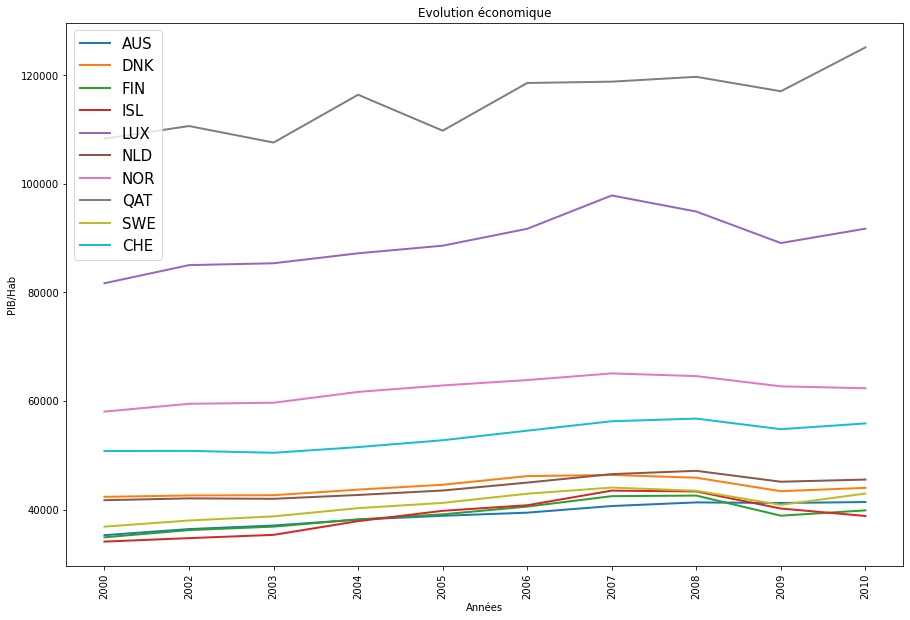

In [1376]:
plt.figure(figsize=(15, 10))
x = dfgdp.columns[1:]
for index in range(10):
    y = dfgdp.iloc[index][1:]
    plt.plot(x, y, label = dfgdp.iloc[index][0],linewidth = 2)
    plt.title('Evolution économique')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('PIB/Hab')
    plt.legend(prop = {'size': 15})

In [1344]:
# Evolution edu_lycee

In [1256]:
sec=df1[df1['Indicator Code']=='SE.SEC.ENRR']

In [1258]:
df2_cat=sec[['Country Code']]

In [1264]:
df_sec=sec[['2000','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [1265]:
dfsec=pd.concat([df2_cat,df_sec],axis=1)

In [1266]:
dfsec.head()

,Country Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129610,AUS,162.610046,154.311722,156.194351,149.942062,148.366104,127.389618,126.366379,128.034058,130.318542,132.456696
287205,DNK,127.054298,126.321533,126.465767,123.658249,124.180923,120.079102,118.825104,117.899757,118.034637,119.569389
334850,FIN,124.759178,128.983475,131.743698,110.912468,111.971077,111.613548,110.329086,108.744270,107.423798,107.272591
411815,ISL,107.403572,111.754097,115.121162,108.170692,109.112640,109.397186,108.871887,109.070839,107.943001,109.289772
514435,LUX,97.061333,96.250420,96.102310,95.458611,95.365189,95.908051,96.724297,97.519211,NaN,101.346169


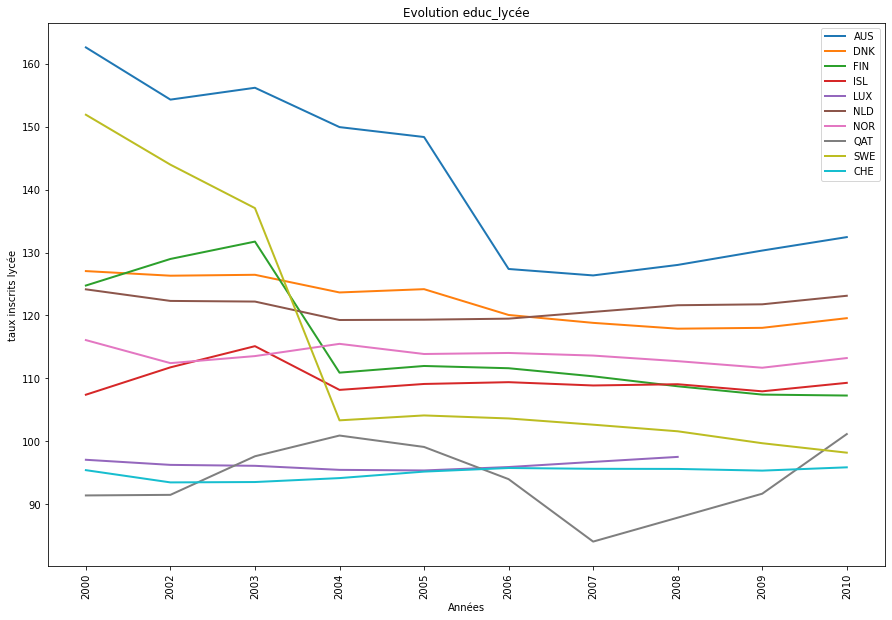

In [1267]:
plt.figure(figsize=(15, 10))
x = dfsec.columns[1:]
for index in range(10):
    y = dfsec.iloc[index][1:]
    plt.plot(x, y, label = dfsec.iloc[index][0],linewidth = 2)
    plt.title('Evolution educ_lycée')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('taux inscrits lycée')
    plt.legend(prop = {'size': 10})

In [1268]:
#Evolution edu_univ

In [1269]:
ter=df1[df1['Indicator Code']=='SE.TER.ENRR']

In [1270]:
df3_cat=ter[['Country Code']]

In [1271]:
df_ter=ter[['2000','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [1272]:
dfter=pd.concat([df3_cat,df_ter],axis=1)

In [1273]:
dfter.head()

,Country Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
129614,AUS,67.038910,75.752434,73.394257,71.698433,72.291924,71.482918,72.519951,72.918541,76.765373,80.917084
287209,DNK,57.249298,63.534271,67.534561,74.436569,80.423492,79.064941,78.584892,75.703438,74.300941,73.619652
334854,FIN,82.439072,84.959351,87.076881,89.663612,91.828644,93.287682,93.977943,95.074463,91.829498,94.119141
411819,ISL,45.481060,54.050018,62.174500,68.412239,70.376732,72.664658,71.721291,74.103279,74.323486,78.353157
514439,LUX,9.814340,11.850520,12.185660,NaN,NaN,10.331200,NaN,10.611080,NaN,18.275150


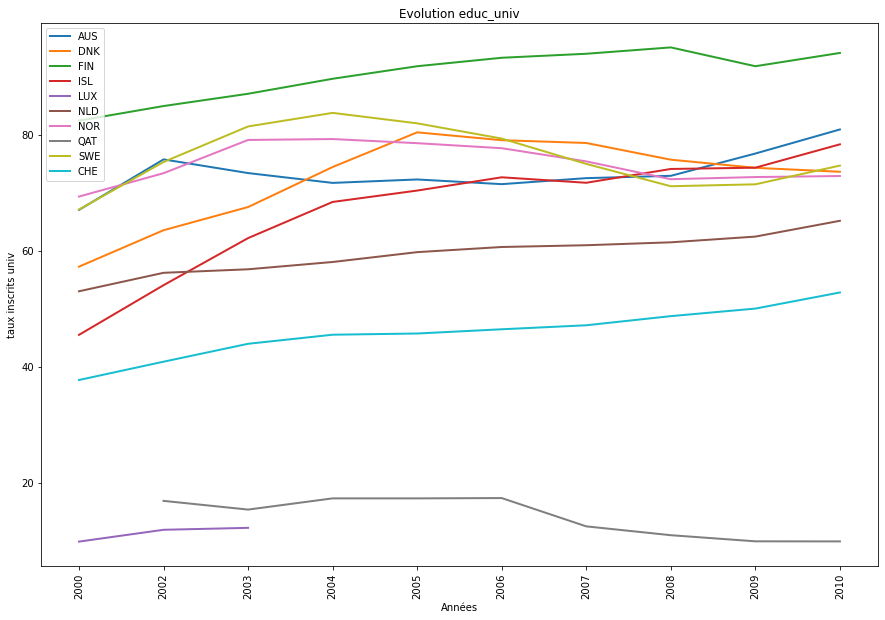

In [1287]:
plt.figure(figsize=(15, 10))
x = dfter.columns[1:]
for index in range(10):
    y = dfter.iloc[index][1:]
    plt.plot(x, y, label = dfter.iloc[index][0],linewidth = 2)
    plt.title('Evolution educ_univ')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('taux inscrits univ')
    plt.legend(prop = {'size': 10})

In [1275]:
#Evolution pop15-24

In [1276]:
pop=df1[df1['Indicator Code']=='SP.POP.1524.TO.UN']

In [1277]:
df4_cat=pop[['Country Code']]

In [1278]:
df_pop=pop[['2000','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [1279]:
dfpop=pd.concat([df4_cat,df_pop],axis=1)

In [1280]:
dfpop.head()

,Country Code,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010
130757,AUS,2621168.0,2677648.0,2722832.0,2768682.0,2808725.0,2841117.0,2867125.0,2887147.0,2902536.0,2914315.0
288352,DNK,610791.0,593474.0,590323.0,591460.0,597020.0,607278.0,621685.0,638495.0,655348.0,670436.0
335997,FIN,659989.0,660161.0,657486.0,654865.0,653396.0,653350.0,654246.0,655543.0,656406.0,656220.0
412962,ISL,42712.0,42888.0,42948.0,43051.0,43231.0,43497.0,43827.0,44181.0,44497.0,44733.0
515582,LUX,50420.0,51188.0,51696.0,52394.0,53334.0,54537.0,55958.0,57498.0,59030.0,60451.0


In [3]:
plt.figure(figsize=(15, 10))
x = dfpop.columns[1:]
for index in range(10):
    y = dfpop.iloc[index][1:]
    plt.plot(x, y, label = dfpop.iloc[index][0],linewidth = 2)
    plt.title('Evolution pop 15-24')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel(' pop 15-24')
    plt.legend(prop = {'size': 12})

NameError: name 'dfpop' is not defined

<Figure size 1080x720 with 0 Axes>